In [1]:
library(readxl)
library(ggplot2)
library("FactoMineR")
library(tidyverse) #data Manipulation
library(cluster) #Clustering algorithms
library(factoextra)#Clustering Algorithms & Visualization
library(gridExtra)
#install.packages("dendextend")
#install.packages("ggplot2")
#install.packages("rlang")
library(dendextend) # For fancy deprograms
library(rlang) # clustering cutting
library("np") #npreg: you may need to install it
library(PerformanceAnalytics)
library(psych)
#install.packages('fmsb')
library(fmsb) #For Spider Plots
#install.packages('countrycode')
library(countrycode)
#install.packages(c('hrbrthemes','viridis'))
#library(hrbrthemes)
#library(viridis)
#install.packages('GGally')
library(GGally)
library(dplyr)
library(ggmap)
library(leaflet)
library(htmltools)
library(dplyr) #getMap()
library(rgeos)
#install.packages('rworldmap')
library(rworldmap) #joinCountryData2Map
library(grid)
library(tidyr)
#install.packages(c("cowplot", "googleway", "ggplot2", "ggrepel", "ggspatial", "sf", "rnaturalearth", "rnaturalearthdata"))
library("sf")
library("rnaturalearth")
library("rnaturalearthdata")
#install.packages('writexl')
library(writexl)
library("RColorBrewer")

Warning message:
"package 'ggplot2' was built under R version 4.0.3"
Warning message:
"package 'FactoMineR' was built under R version 4.0.3"
Warning message:
"package 'tidyverse' was built under R version 4.0.3"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v tibble  3.0.6     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1
v purrr   0.3.4     

Warning message:
"package 'tibble' was built under R version 4.0.3"
Warning message:
"package 'dplyr' was built under R version 4.0.3"
Warning message:
"package 'forcats' was built under R version 4.0.3"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Warning message:
"package 'factoextra' was built under R version 4.0.3"
Welcome! Want to learn more? See two factoextra-related books

In [2]:
df.wa.fa <- read_excel("../../results/df-five-scores.xlsx",sheet=1)
dfsimple <- read_excel("../../results/dfsimple.xlsx",sheet=1)
df <- df.wa.fa[,c(2:6)]
head(df,7)
df <- df %>% 
  rename(
     Tap_UWS_excursion_No_watp = ML4,
     Natural_Commodity_Water_No_phom = ML3,
     Protected_Well_No_pipy = ML2,
     Water_Trucking_No_bore = ML1,
     Spring_No_well = ML5
     )

head(df,7)

ML4,ML3,ML2,ML1,ML5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.7180895,0.947179463,0.8835872,0.7634235,0.2686459
0.4514531,0.451805440,0.8256810,0.8877911,0.3345356
0.7249451,0.953864441,0.8199022,0.9546776,0.2823771
0.5306486,0.006983022,0.7361201,0.8464063,0.3454025
0.5745546,0.565446750,0.5808397,0.7953093,0.3850820
0.4949342,0.761408482,0.7931200,0.0000000,0.3454896
0.7928975,0.904114983,0.8876618,0.6709822,0.1622302


Tap_UWS_excursion_No_watp,Natural_Commodity_Water_No_phom,Protected_Well_No_pipy,Water_Trucking_No_bore,Spring_No_well
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.7180895,0.947179463,0.8835872,0.7634235,0.2686459
0.4514531,0.451805440,0.8256810,0.8877911,0.3345356
0.7249451,0.953864441,0.8199022,0.9546776,0.2823771
0.5306486,0.006983022,0.7361201,0.8464063,0.3454025
0.5745546,0.565446750,0.5808397,0.7953093,0.3850820
0.4949342,0.761408482,0.7931200,0.0000000,0.3454896
0.7928975,0.904114983,0.8876618,0.6709822,0.1622302


 Tap_UWS_excursion_No_watp Natural_Commodity_Water_No_phom
 Min.   :0.0000            Min.   :0.0000                 
 1st Qu.:0.5357            1st Qu.:0.6528                 
 Median :0.6782            Median :0.8485                 
 Mean   :0.6520            Mean   :0.7591                 
 3rd Qu.:0.8177            3rd Qu.:0.9303                 
 Max.   :1.0000            Max.   :1.0000                 
 Protected_Well_No_pipy Water_Trucking_No_bore Spring_No_well  
 Min.   :0.0000         Min.   :0.0000         Min.   :0.0000  
 1st Qu.:0.6163         1st Qu.:0.7401         1st Qu.:0.2408  
 Median :0.8228         Median :0.8553         Median :0.3345  
 Mean   :0.7456         Mean   :0.7942         Mean   :0.3292  
 3rd Qu.:0.8894         3rd Qu.:0.8920         3rd Qu.:0.3744  
 Max.   :1.0000         Max.   :1.0000         Max.   :1.0000  

Tap_UWS_excursion_No_watp,Natural_Commodity_Water_No_phom,Protected_Well_No_pipy,Water_Trucking_No_bore,Spring_No_well
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.7180895,0.947179463,0.8835872,0.7634235,0.2686459
0.4514531,0.451805440,0.8256810,0.8877911,0.3345356
0.7249451,0.953864441,0.8199022,0.9546776,0.2823771
0.5306486,0.006983022,0.7361201,0.8464063,0.3454025
0.5745546,0.565446750,0.5808397,0.7953093,0.3850820
0.4949342,0.761408482,0.7931200,0.0000000,0.3454896


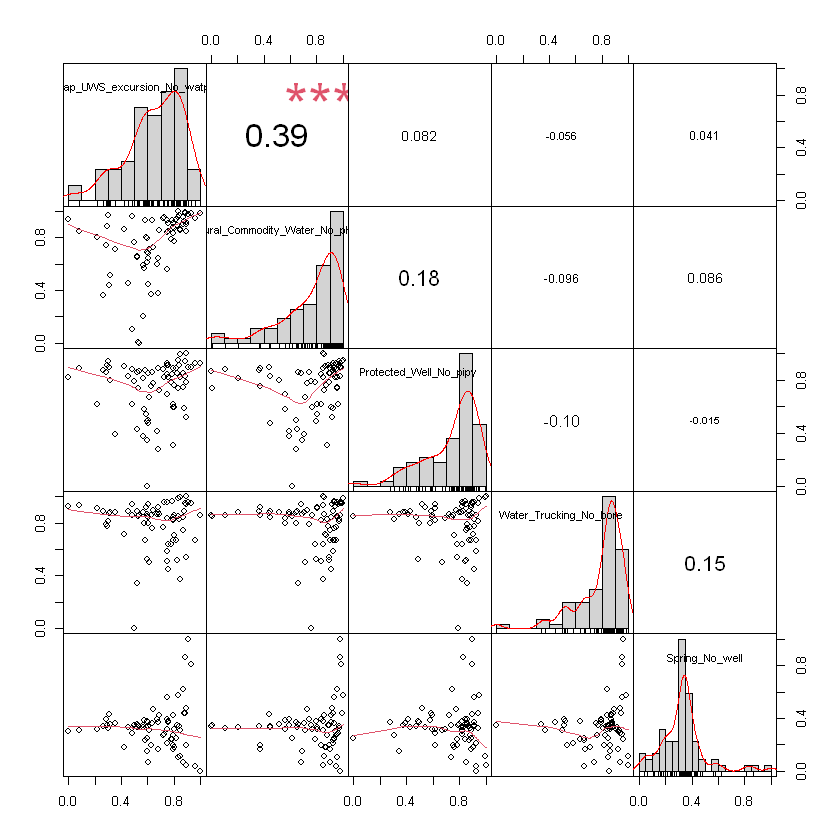

In [3]:
summary(df)
head(df)
chart.Correlation(df, histogram=TRUE, pch=19 , tl.cex = .7 )

In [4]:
# Create data: Water Accessibility Aggregate
dfsimple$clusters
df.wa.aggregate <- aggregate(df, list(clusters=dfsimple$clusters), mean)
df.wa.avg <- df.wa.aggregate[,1:6]
df.wa.avg

[1] 1 2 1 2 3 1 1 3 1 4 5 1 1 2 3 3 4 3 5 2 1 3 4 3 3 1 3 1 3 4 2 1 5 2 3 3 3 1
[39] 4 1 5 1 1 2 2 1 1 3 1 3 1 1 1 4 2 5 4 3 3 4 3 3 1 3 1 2 3 1 2 3 5 1 1

clusters,Tap_UWS_excursion_No_watp,Natural_Commodity_Water_No_phom,Protected_Well_No_pipy,Water_Trucking_No_bore,Spring_No_well
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.7629289,0.8759209,0.8399478,0.6483621,0.2373204
2,0.4885360,0.3197673,0.8365270,0.8804717,0.2936669
3,0.6405560,0.7314003,0.4984980,0.8669720,0.3435318
4,0.8630809,0.9737095,0.8855350,0.9270937,0.6511984
5,0.2316138,0.8743117,0.8895723,0.8244155,0.3104319


In [5]:
# Set1 easy to see '#E41A1C','#377EB8','#4DAF4A','#984EA3','#FF7F00'
brewer.pal(n = 5, name = "Set1") # Best color scheme is Set1 

[1] "#E41A1C" "#377EB8" "#4DAF4A" "#984EA3" "#FF7F00"

[1] 1.879230 2.429438 3.326171 4.445307 5.233109

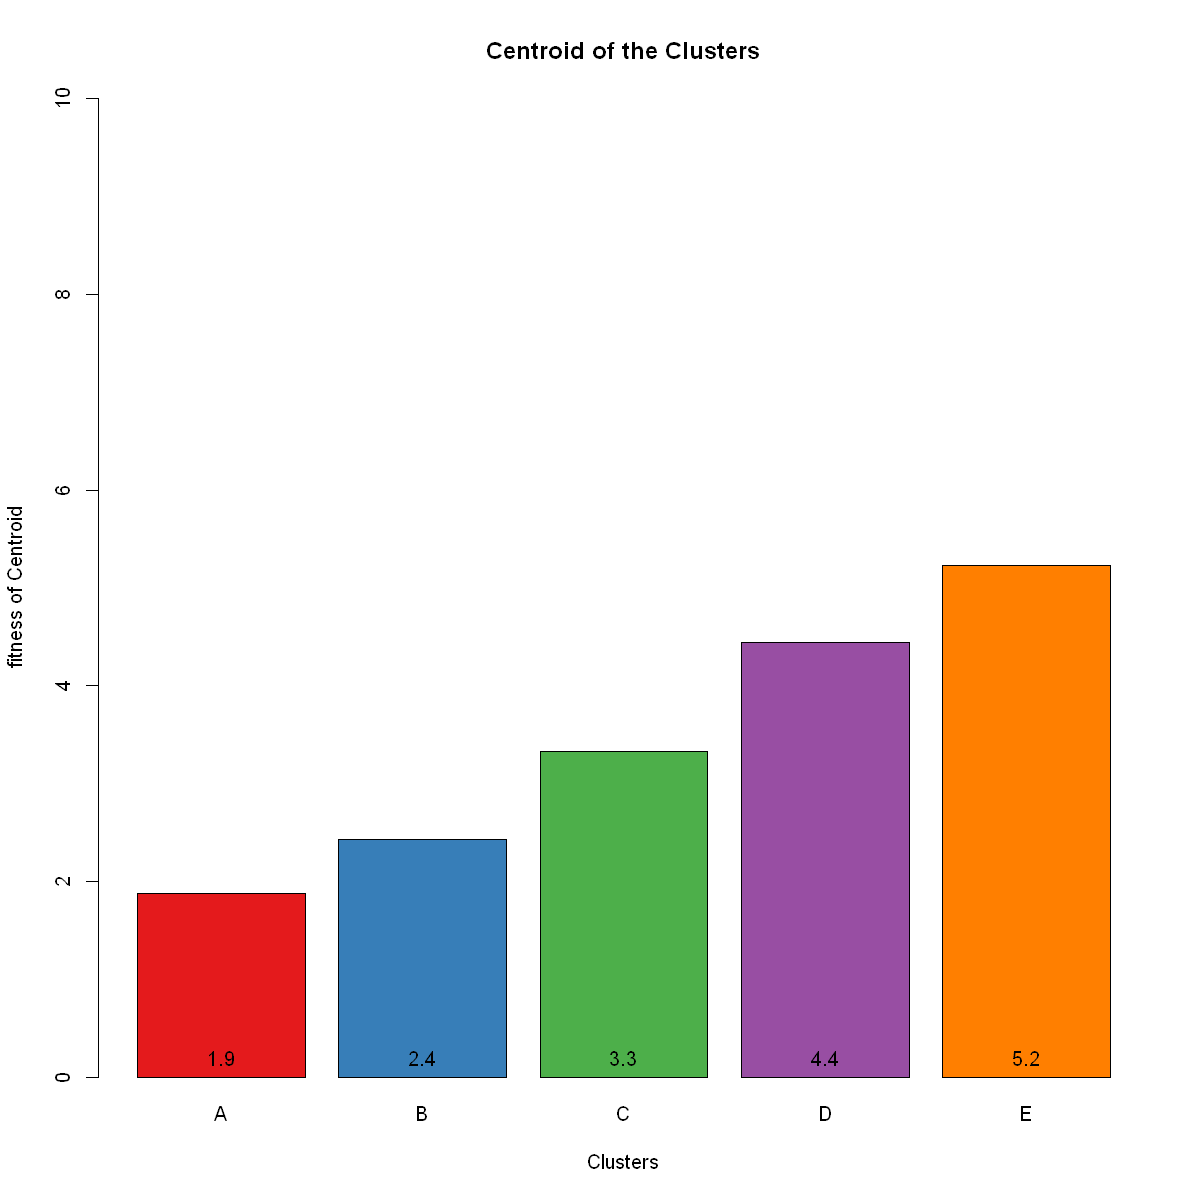

[1] 1.687754 1.410594 1.760338 1.288106 1.329670 1.254235

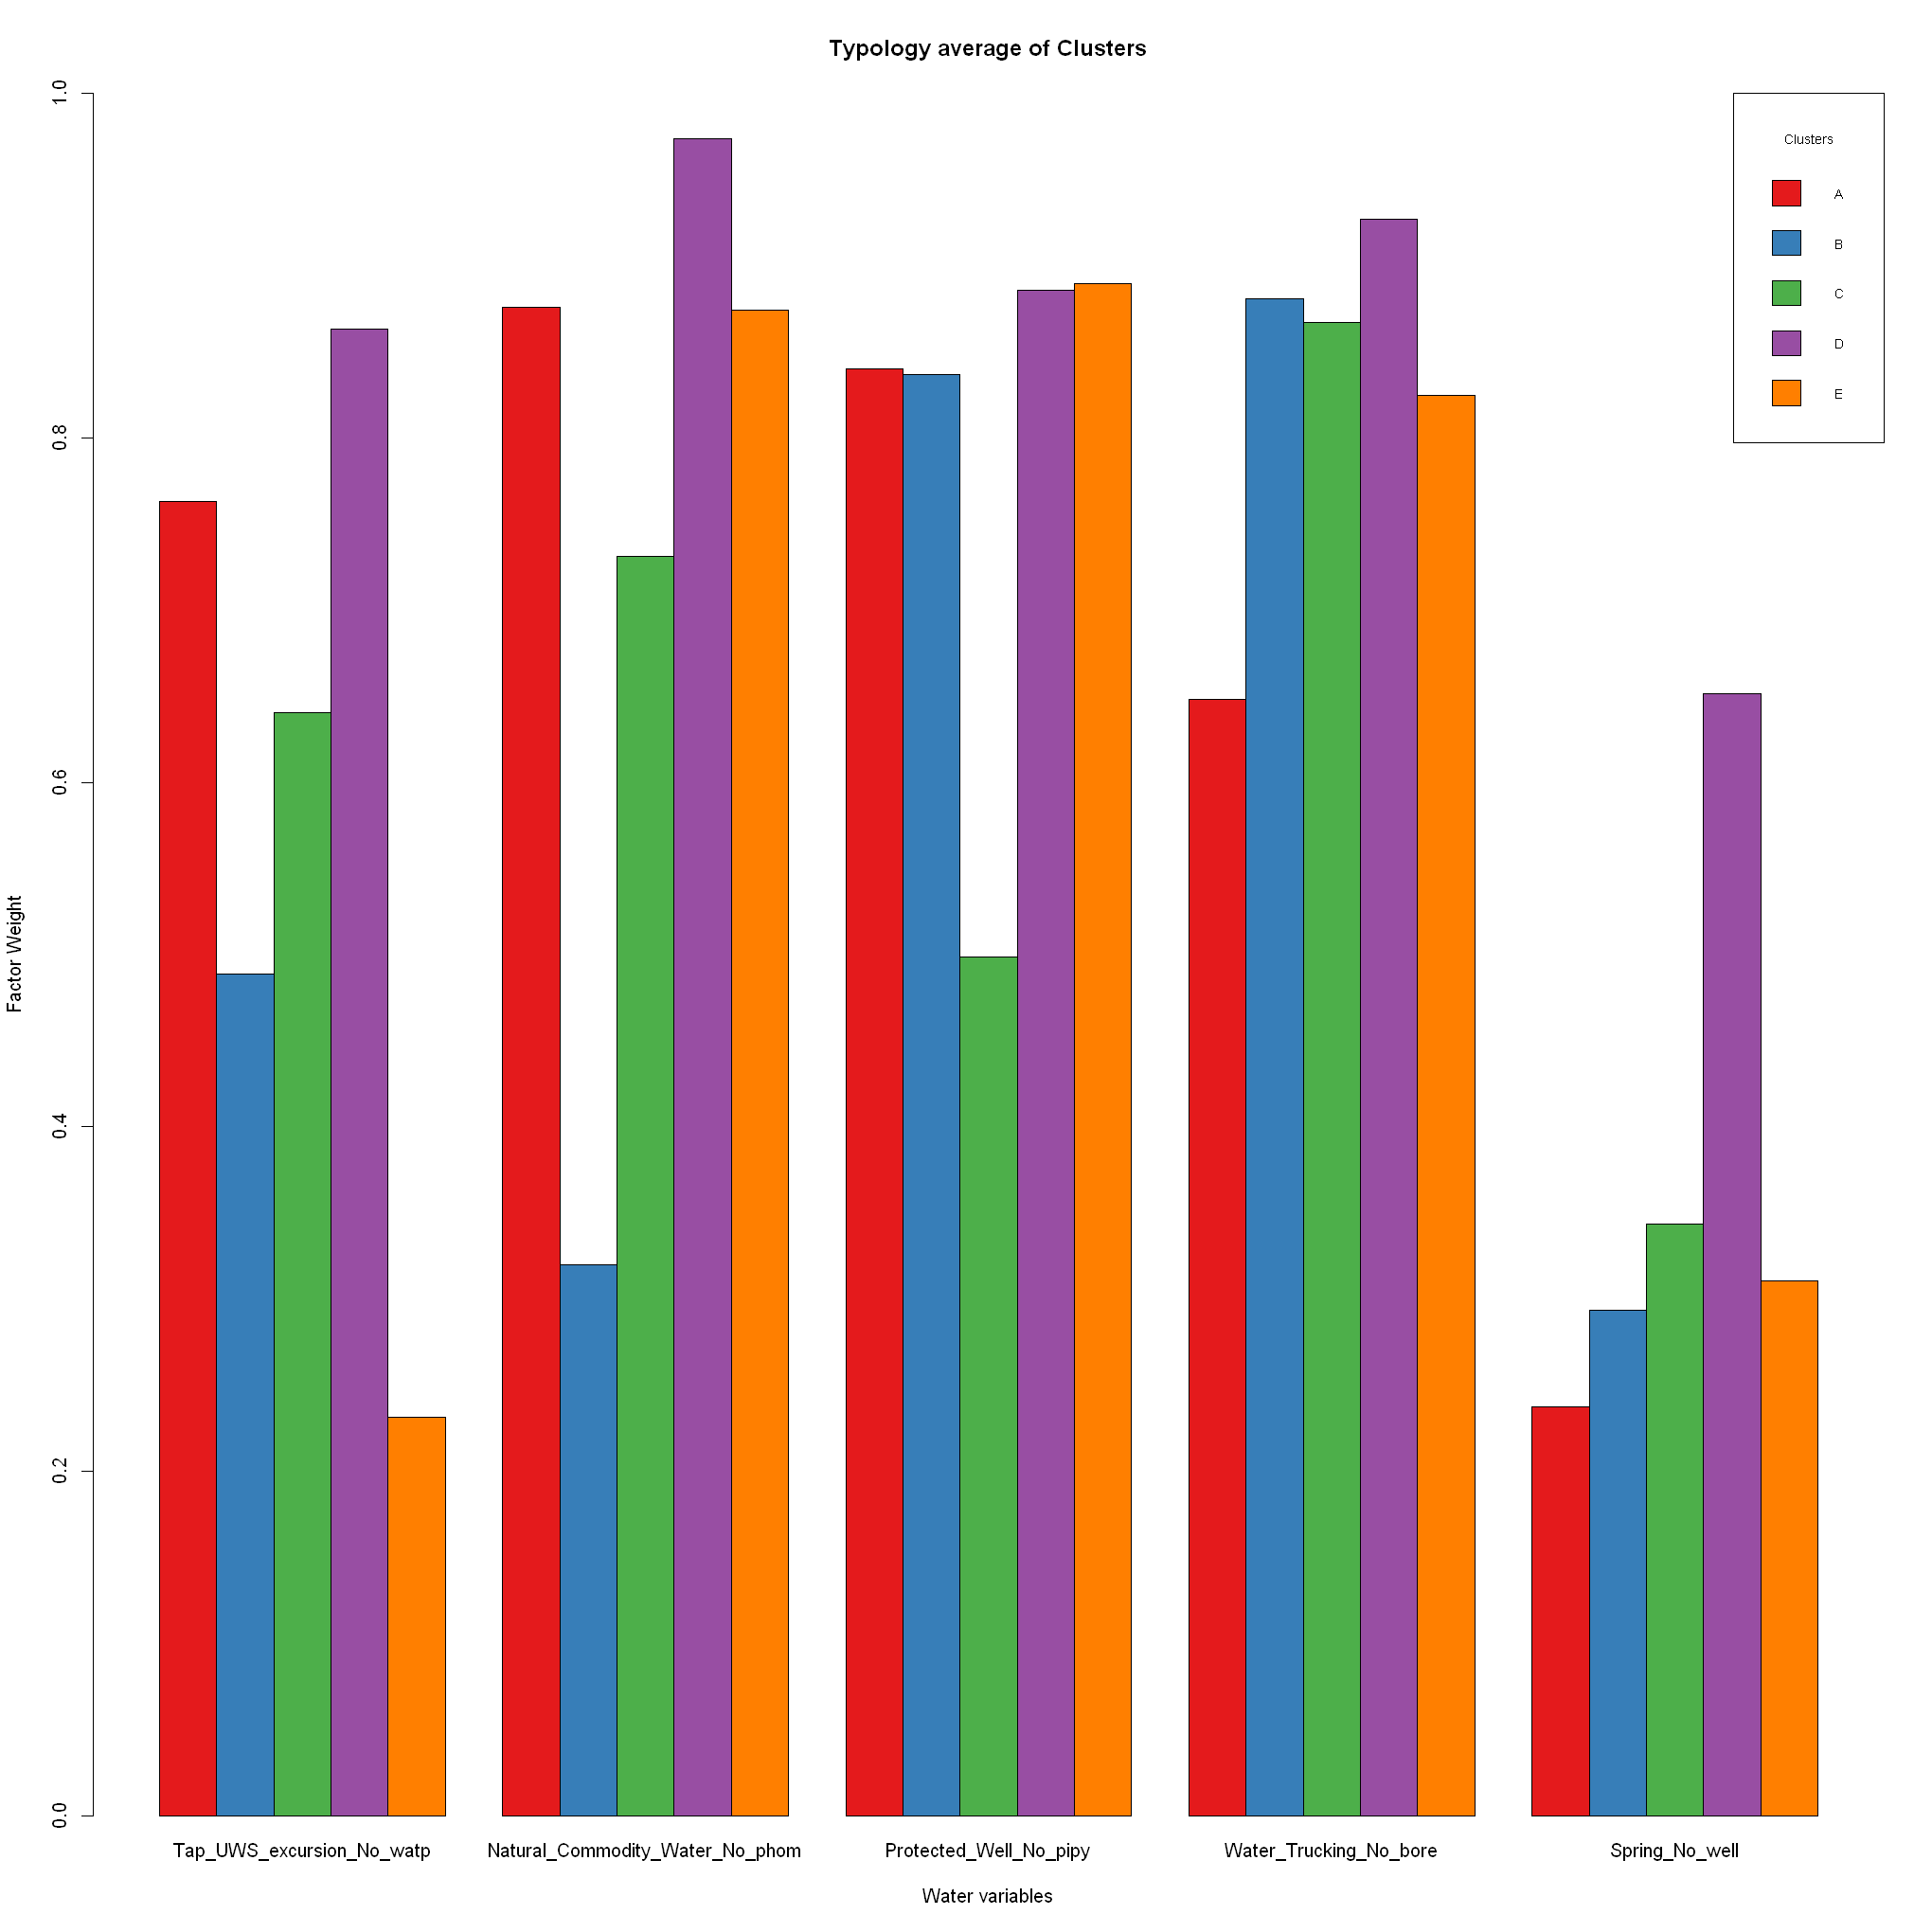

In [6]:
centroid <- apply(df.wa.aggregate, 1, function(x) sqrt(sum(x^2)) ) #How close is each country to the centroid of the cluster
centroid
                  
options(repr.plot.width=10, repr.plot.height=10)                  
old.par <- par(mar = c(0, 0, 0, 0))
par(old.par)

bp <- barplot(centroid,
        main = "Centroid of the Clusters", xlab = "Clusters", ylab = "fitness of Centroid",
        col = c('#E41A1C','#377EB8','#4DAF4A','#984EA3','#FF7F00'),
        ylim = c(0, 10), names.arg = c("A", "B", "C","D", "E"))
text(bp, 0, round(centroid, 1),cex=1,pos=3)
options(repr.plot.width=17, repr.plot.height=17)
barplot(as.matrix(abs(df.wa.avg[,c(2:6)])),
        beside = TRUE,
        main = "Typology average of Clusters", xlab = "Water variables", ylab = "Factor Weight",
        col = c('#E41A1C','#377EB8','#4DAF4A','#984EA3','#FF7F00'),
        legend = c("A", "B", "C","D", "E"), 
        args.legend = list(title = "Clusters", x = "topright", cex = .7), ylim = c(0, 1))
                  


centroiddf.wa <- apply(df, 1, function(x) sqrt(sum(x^2)) ) #How close is each country to the cen-troid of the cluster
head(centroiddf.wa)


,Tap_UWS_excursion_No_watp,Natural_Commodity_Water_No_phom,Protected_Well_No_pipy,Water_Trucking_No_bore,Spring_No_well
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000
2,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
3,0.7629289,0.8759209,0.8399478,0.6483621,0.2373204
4,0.4885360,0.3197673,0.8365270,0.8804717,0.2936669
5,0.6405560,0.7314003,0.4984980,0.8669720,0.3435318
6,0.8630809,0.9737095,0.8855350,0.9270937,0.6511984
7,0.2316138,0.8743117,0.8895723,0.8244155,0.3104319


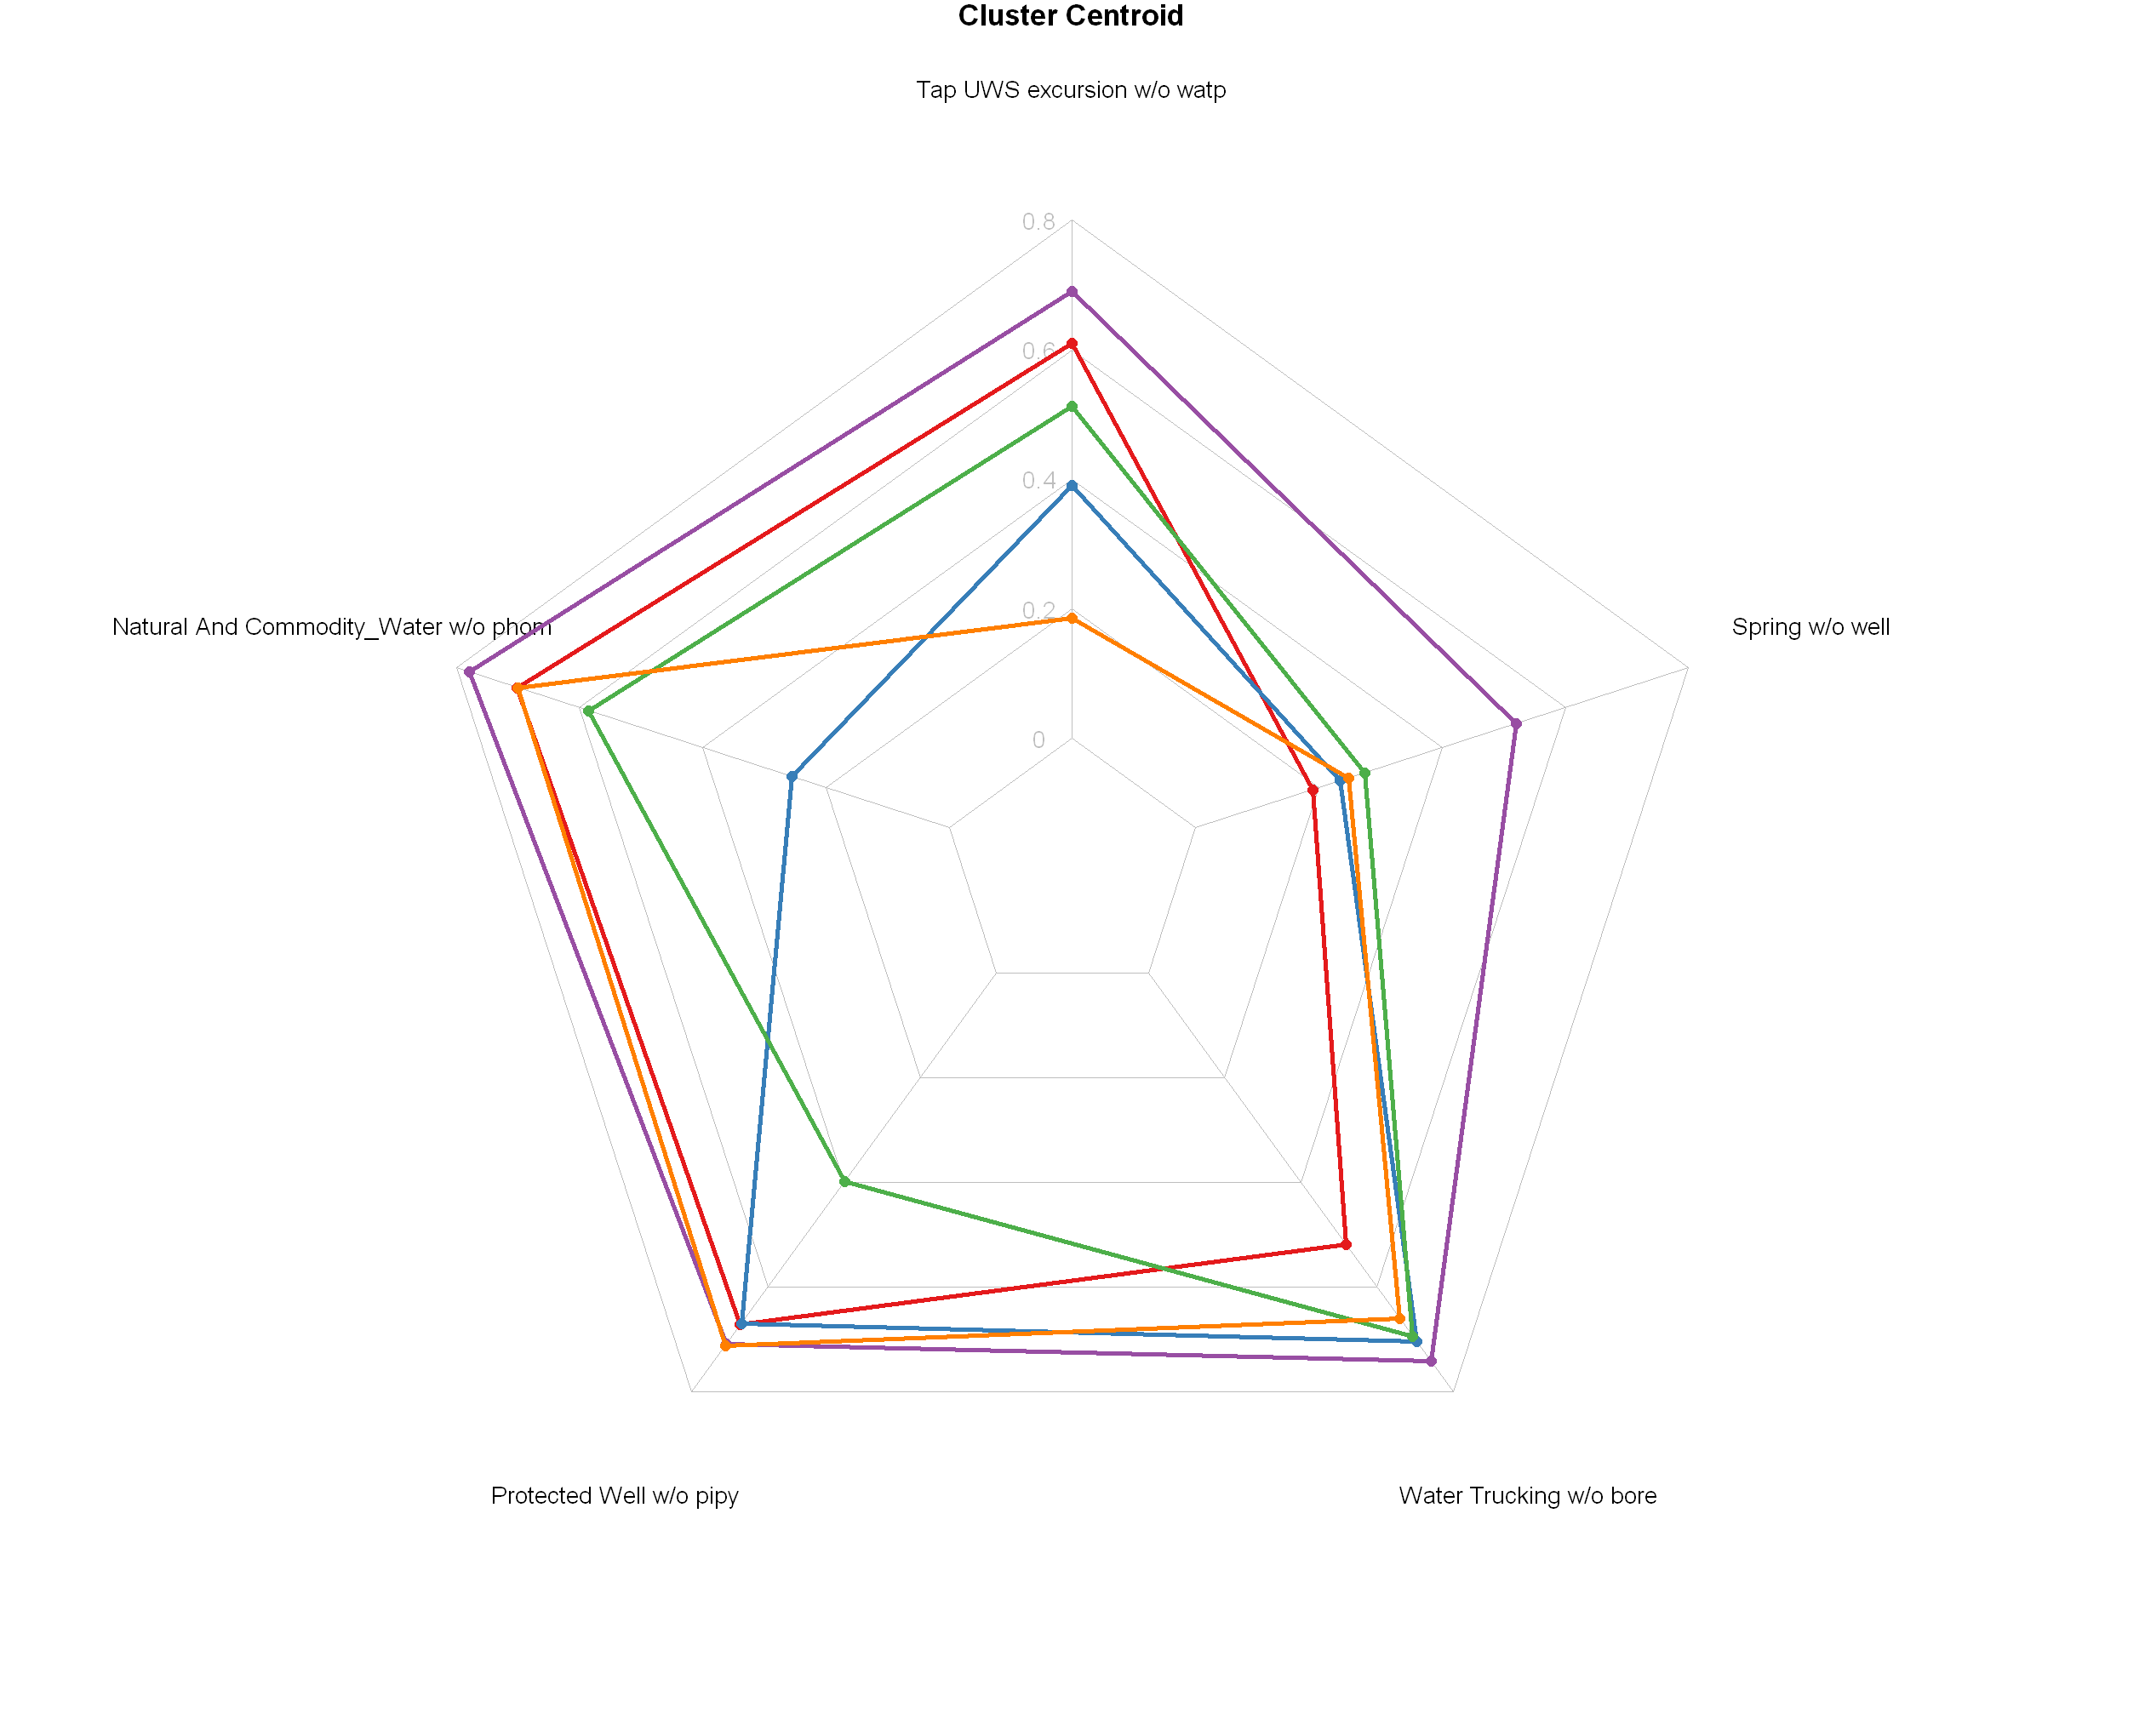

In [7]:
data.spider <- rbind(rep(1,1) , rep(0,1) , df.wa.avg[,c(2:6)])

head(data.spider,7)
colnames(data.spider) <- c(                 
     "Tap UWS excursion w/o watp" ,
     "Natural And Commodity_Water w/o phom",
     "Protected Well w/o pipy" ,
     "Water Trucking w/o bore" ,
     "Spring w/o well" 
)                       
options(repr.plot.width=21, repr.plot.height=17)
par(mar = c(1,1,1,1))
par(cex=1.4)

# The default radar chart for First Cluster
r.c. <- radarchart(data.spider,
           #custom polygon
           pcol= c('#E41A1C','#377EB8','#4DAF4A','#984EA3','#FF7F00' ) ,
           plwd=4 , plty=1,
           #custom the grid
           cglcol="grey", cglty=1, axislabcol="grey", caxislabels= seq(0,1,.2), cglwd=0.8, axistype = 4,
           title = 'Cluster Centroid',
           vlcex=1,
           calcex = 1 ,
                   
           )

In [8]:
head(df.wa.aggregate)

,clusters,Tap_UWS_excursion_No_watp,Natural_Commodity_Water_No_phom,Protected_Well_No_pipy,Water_Trucking_No_bore,Spring_No_well
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.7629289,0.8759209,0.8399478,0.6483621,0.2373204
2,2,0.4885360,0.3197673,0.8365270,0.8804717,0.2936669
3,3,0.6405560,0.7314003,0.4984980,0.8669720,0.3435318
4,4,0.8630809,0.9737095,0.8855350,0.9270937,0.6511984
5,5,0.2316138,0.8743117,0.8895723,0.8244155,0.3104319


# Box Plot of Water Accessibility Variables (Violin Plots)

Tap_UWS_excursion_No_watp,Natural_Commodity_Water_No_phom,Protected_Well_No_pipy,Water_Trucking_No_bore,Spring_No_well
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.7629289,0.8759209,0.8399478,0.6483621,0.2373204
0.4885360,0.3197673,0.8365270,0.8804717,0.2936669
0.6405560,0.7314003,0.4984980,0.8669720,0.3435318
0.8630809,0.9737095,0.8855350,0.9270937,0.6511984
0.2316138,0.8743117,0.8895723,0.8244155,0.3104319


[1] "factor" "factor" "factor" "factor" "factor"

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"position_dodge requires non-overlapping x intervals"


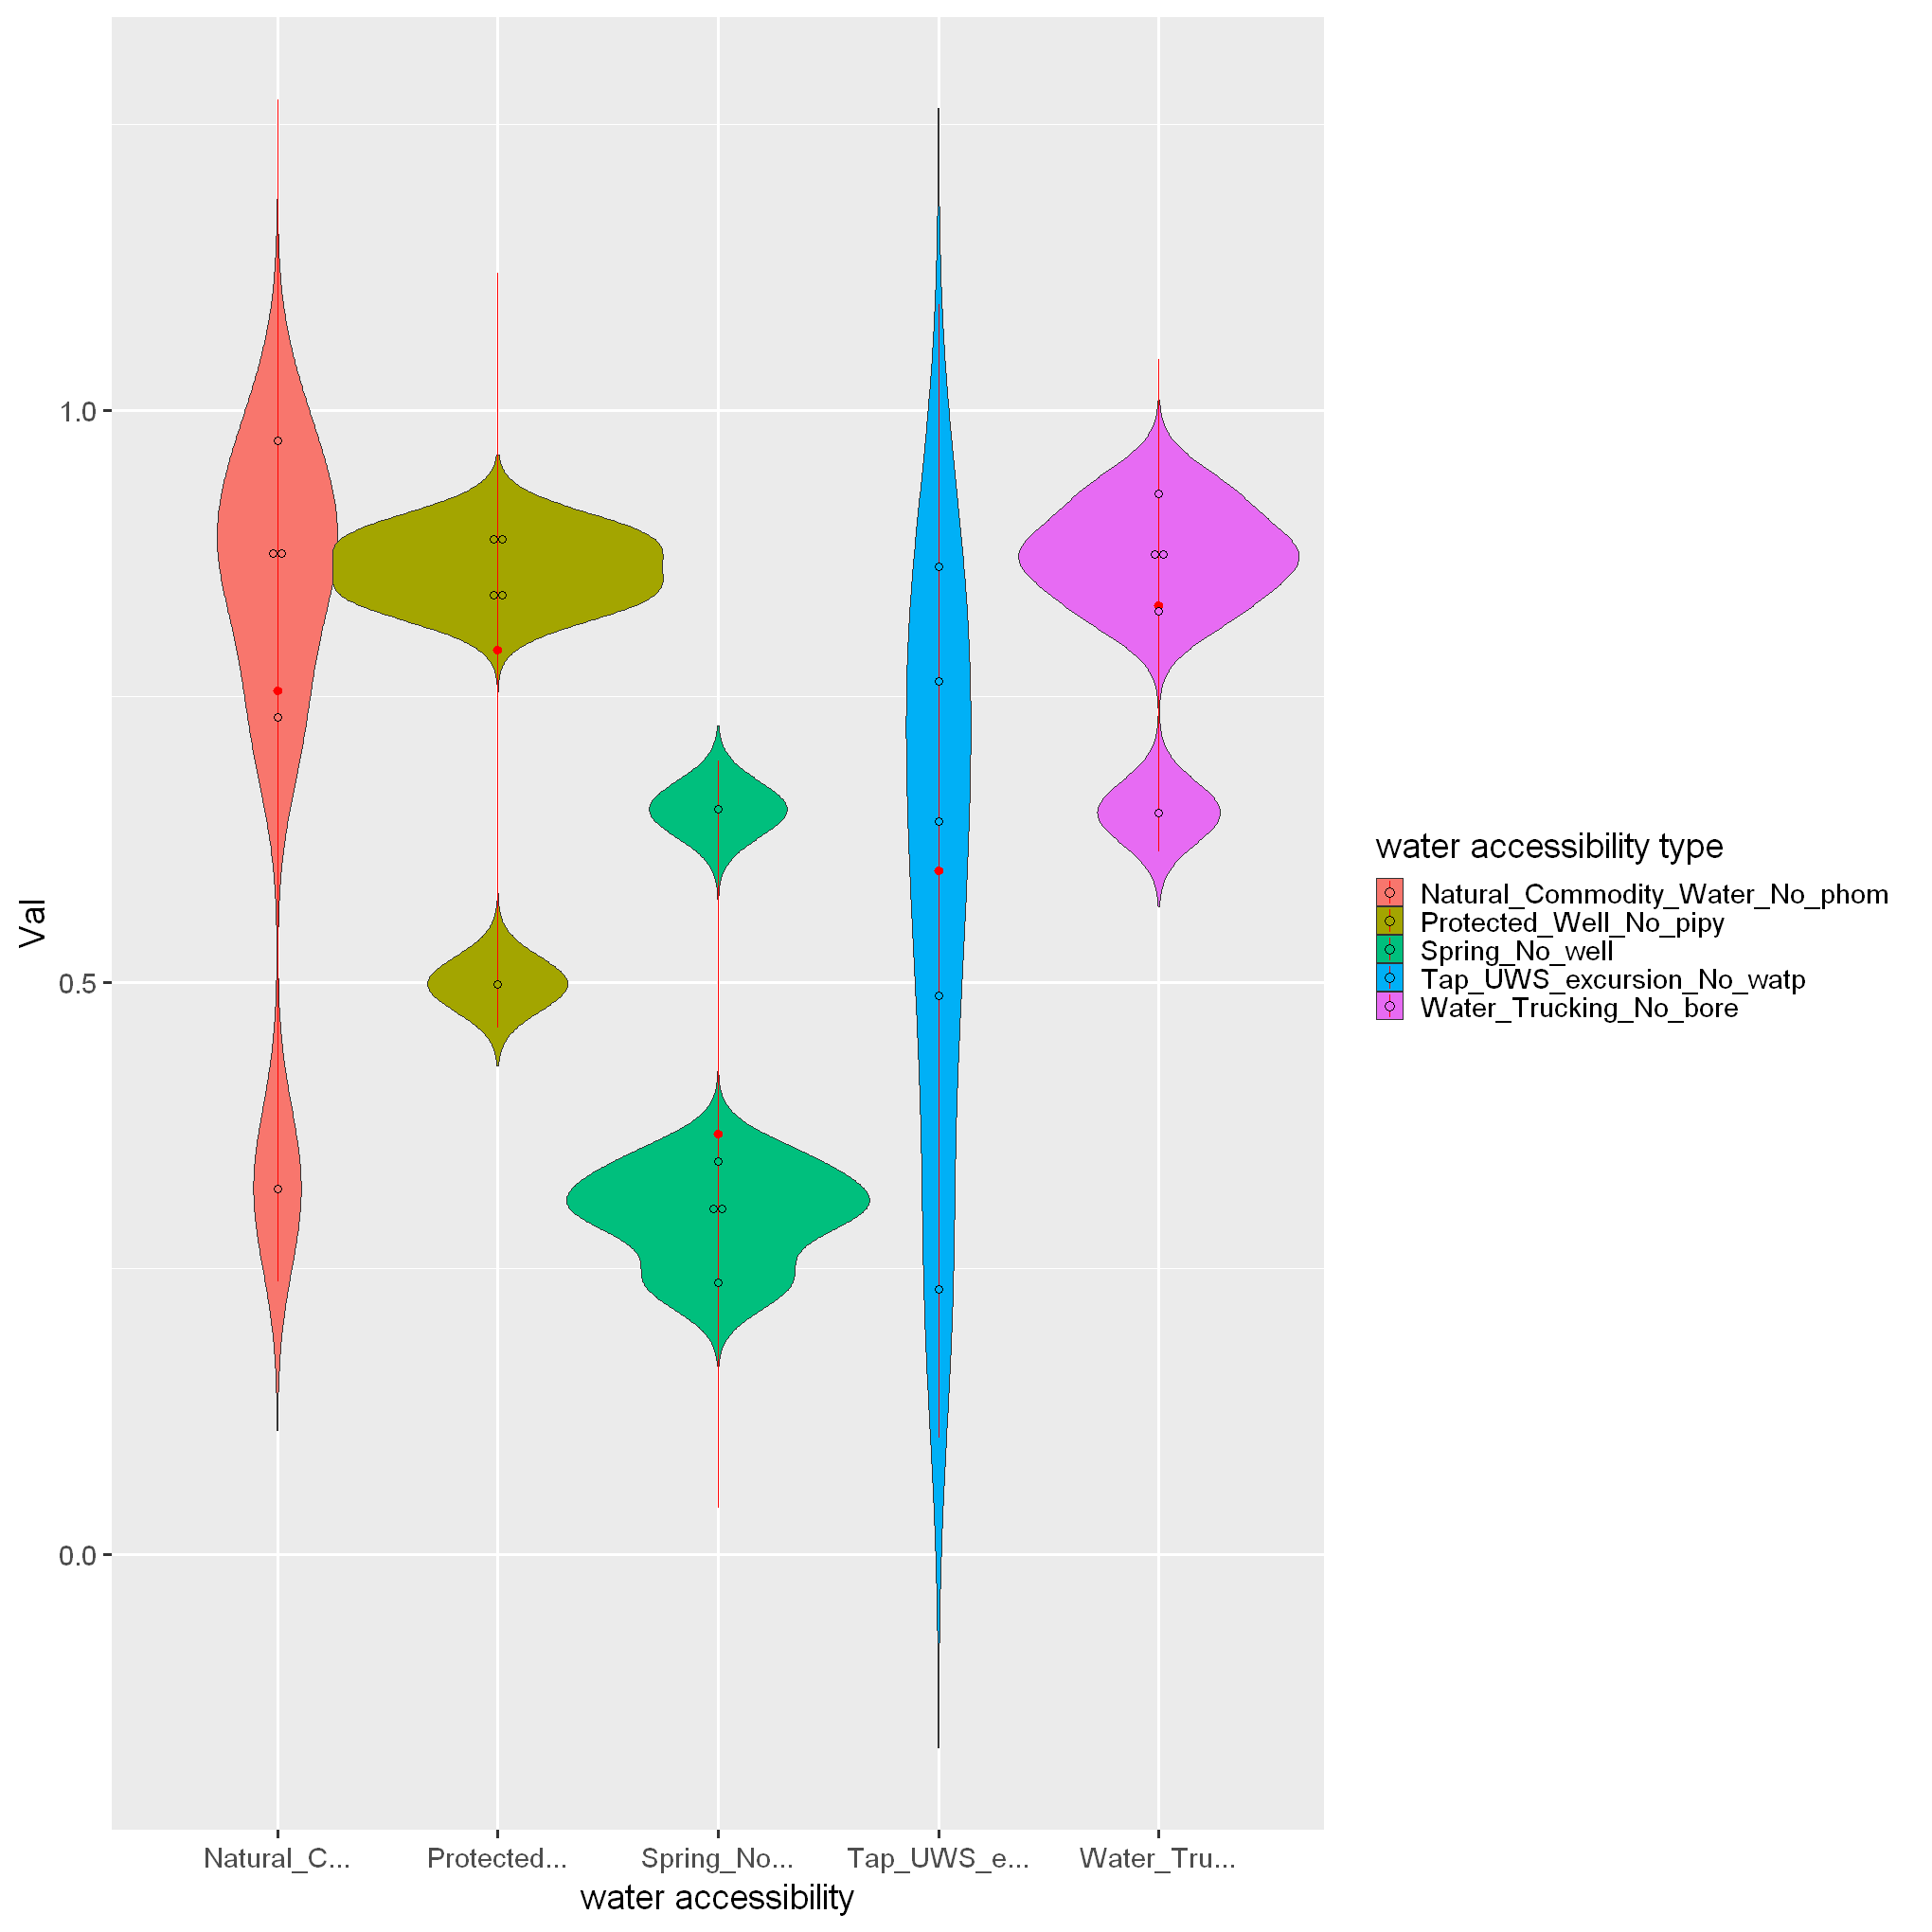

In [9]:
df.wa.aggregate <- aggregate(df, list(clusters=dfsimple$clusters), mean)
df.wa.aggregate <- df.wa.aggregate[,2:6]
df.wa.aggregate
rownames(df.wa.aggregate) <- c('A','B','C','D','E')

data_wa_one <- df.wa.aggregate[  ,1:5]

df.wa.aggregate <- as.factor(df.wa.aggregate[,])
sapply(df.wa.aggregate, class)


options(repr.plot.width=17, repr.plot.height=17)
par(mar = c(1,1,1,1))
par(cex=5)

p <- data_wa_one %>% 
    gather(key="MesureType", value="Val") %>%
    ggplot( aes(x=MesureType, y=Val, fill=MesureType)) +
    geom_violin(trim=FALSE, width=1.5, size=.3) + 
    
    stat_summary(fun.data=mean_sdl, geom="pointrange", color="red") + 
    scale_color_brewer(palette="Set1") +
    xlab('water accessibility') +
    geom_dotplot(binaxis='y', stackdir='center', dotsize=.3) +
    guides(fill =guide_legend("water accessibility type")) + 
    scale_x_discrete(label = function(x) stringr::str_trunc(x, 12))
p <- p + theme_grey(base_size = 22)
p 




# Facet Graphs 


 1  2  3  4  5 
26 11 22  8  6 

clusters,Tap_UWS_excursion_No_watp,Natural_Commodity_Water_No_phom,Protected_Well_No_pipy,Water_Trucking_No_bore,Spring_No_well
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.7629289,0.8759209,0.8399478,0.6483621,0.2373204
2,0.4885360,0.3197673,0.8365270,0.8804717,0.2936669
3,0.6405560,0.7314003,0.4984980,0.8669720,0.3435318
4,0.8630809,0.9737095,0.8855350,0.9270937,0.6511984
5,0.2316138,0.8743117,0.8895723,0.8244155,0.3104319


clusters       Tap_UWS_excursion_No_watp 
                       "factor"                       "numeric" 
Natural_Commodity_Water_No_phom          Protected_Well_No_pipy 
                      "numeric"                       "numeric" 
         Water_Trucking_No_bore                  Spring_No_well 
                      "numeric"                       "numeric"

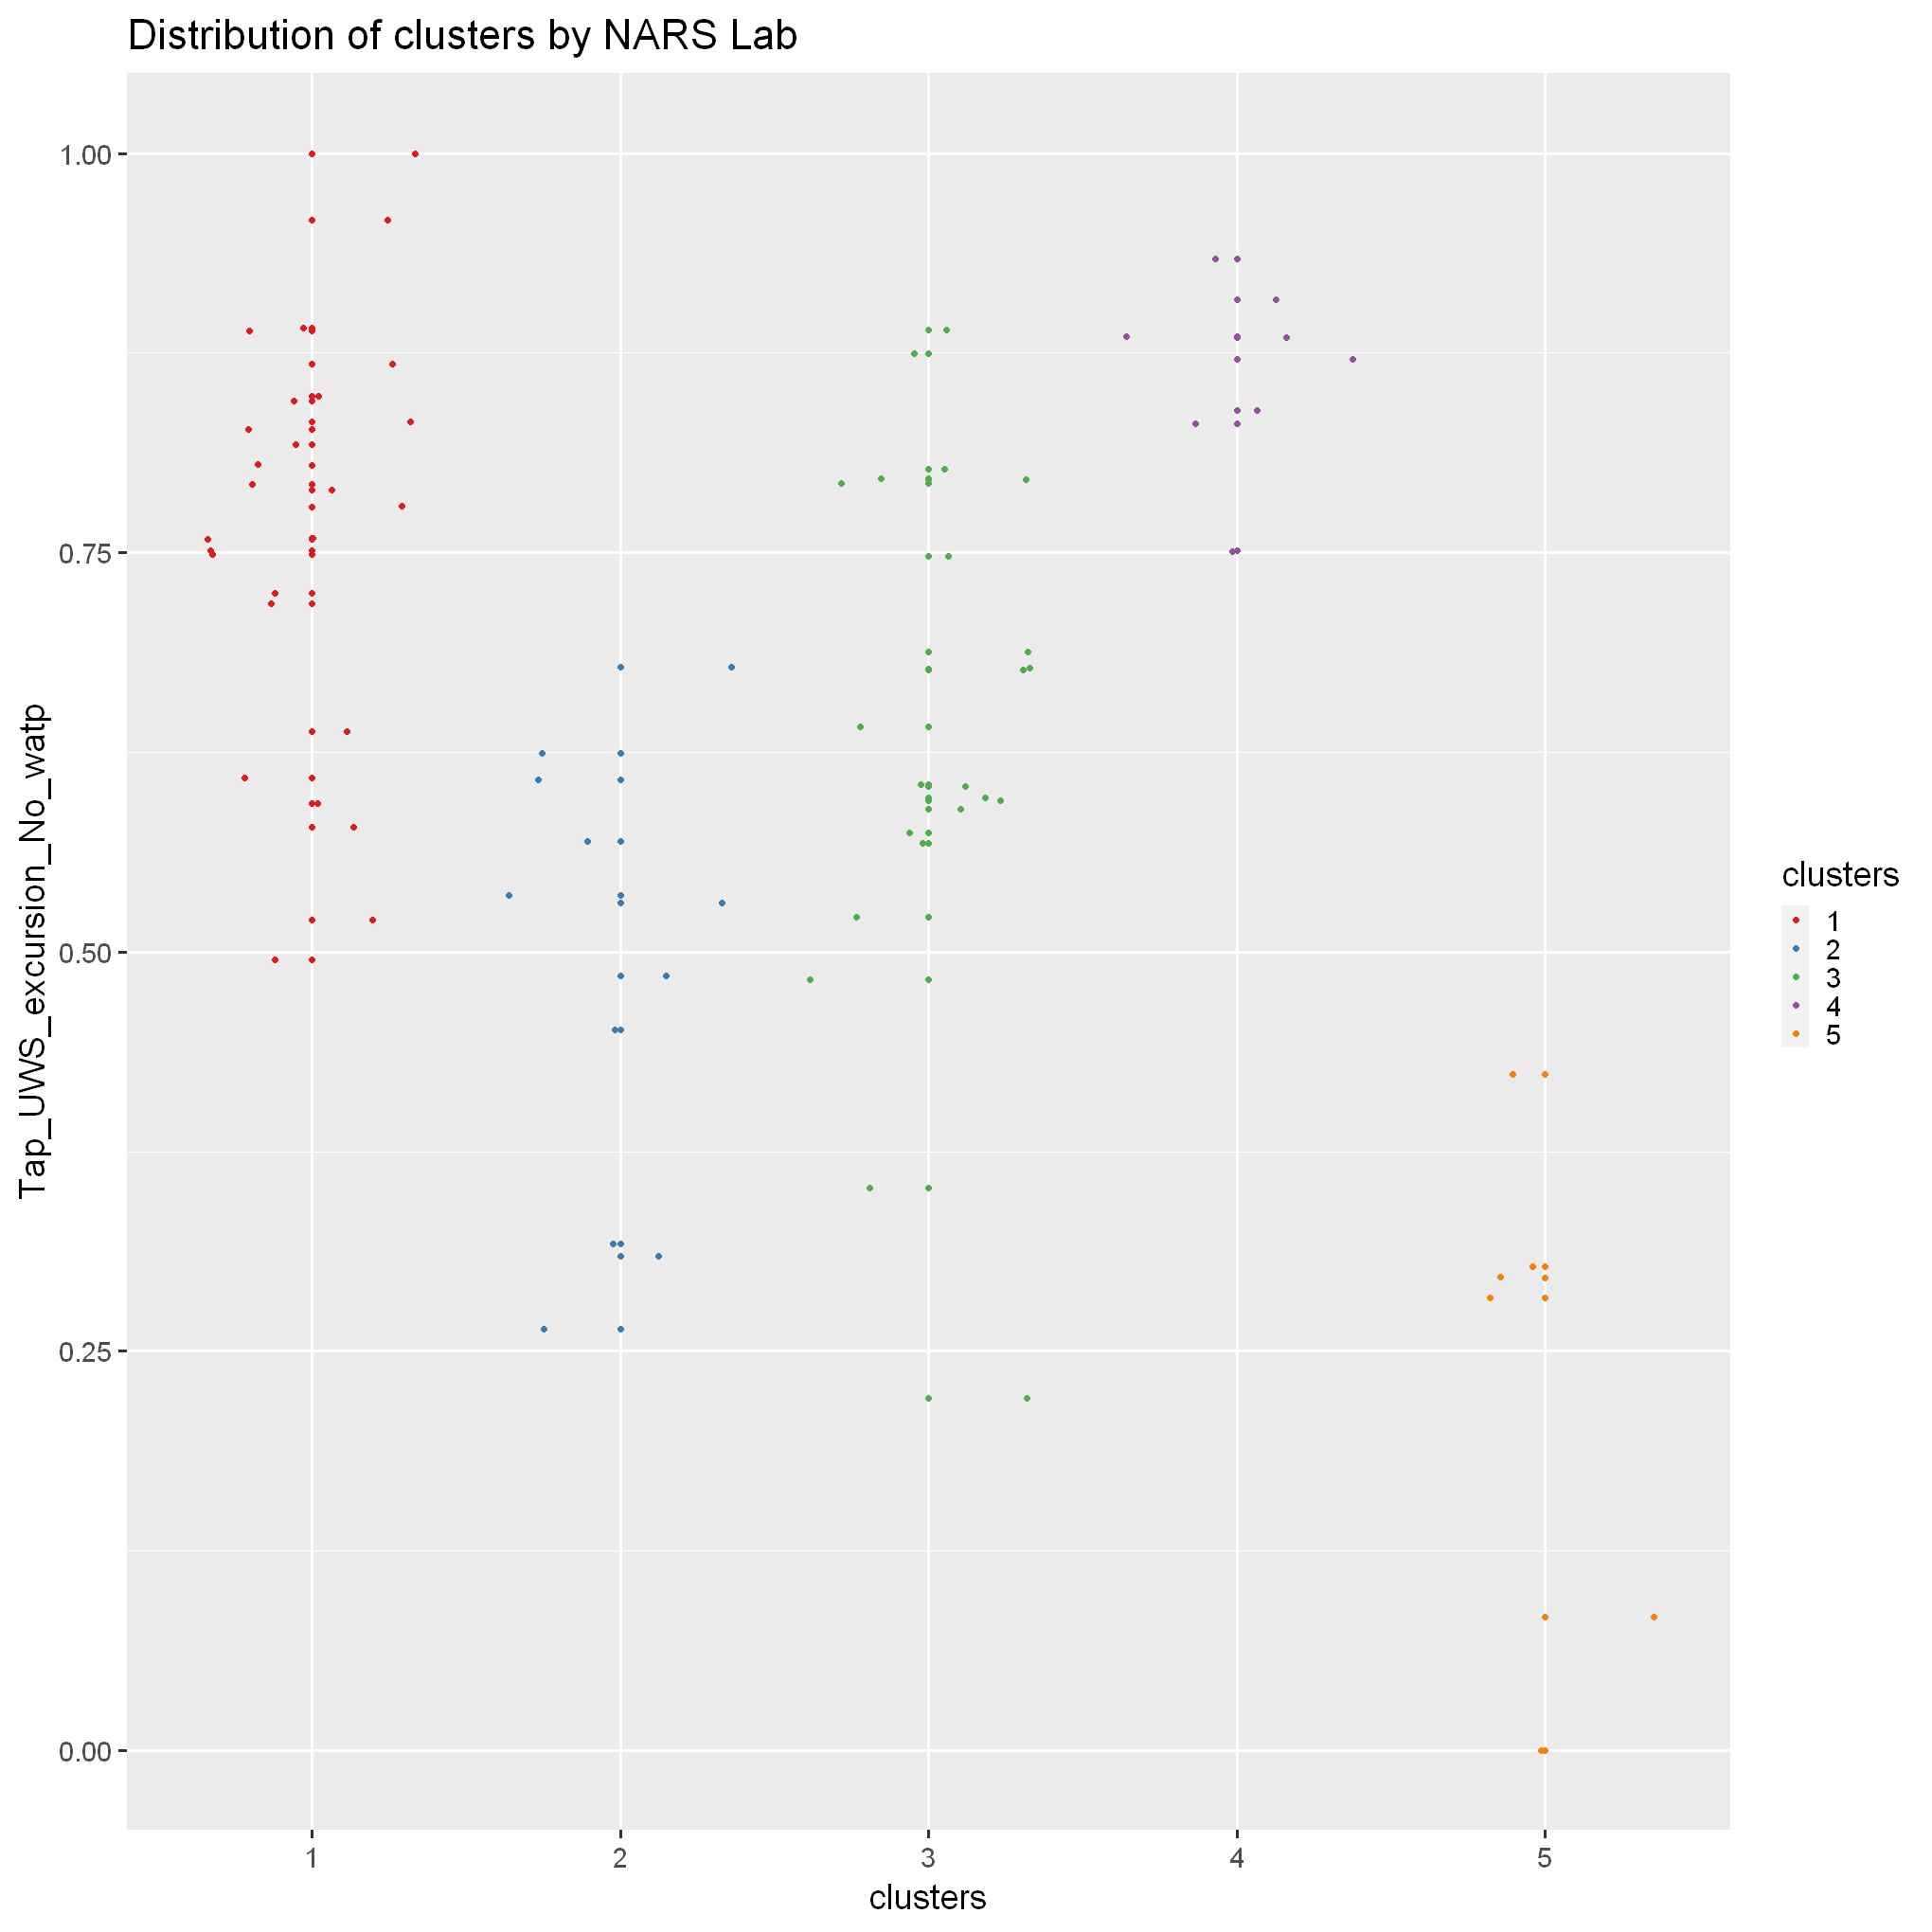

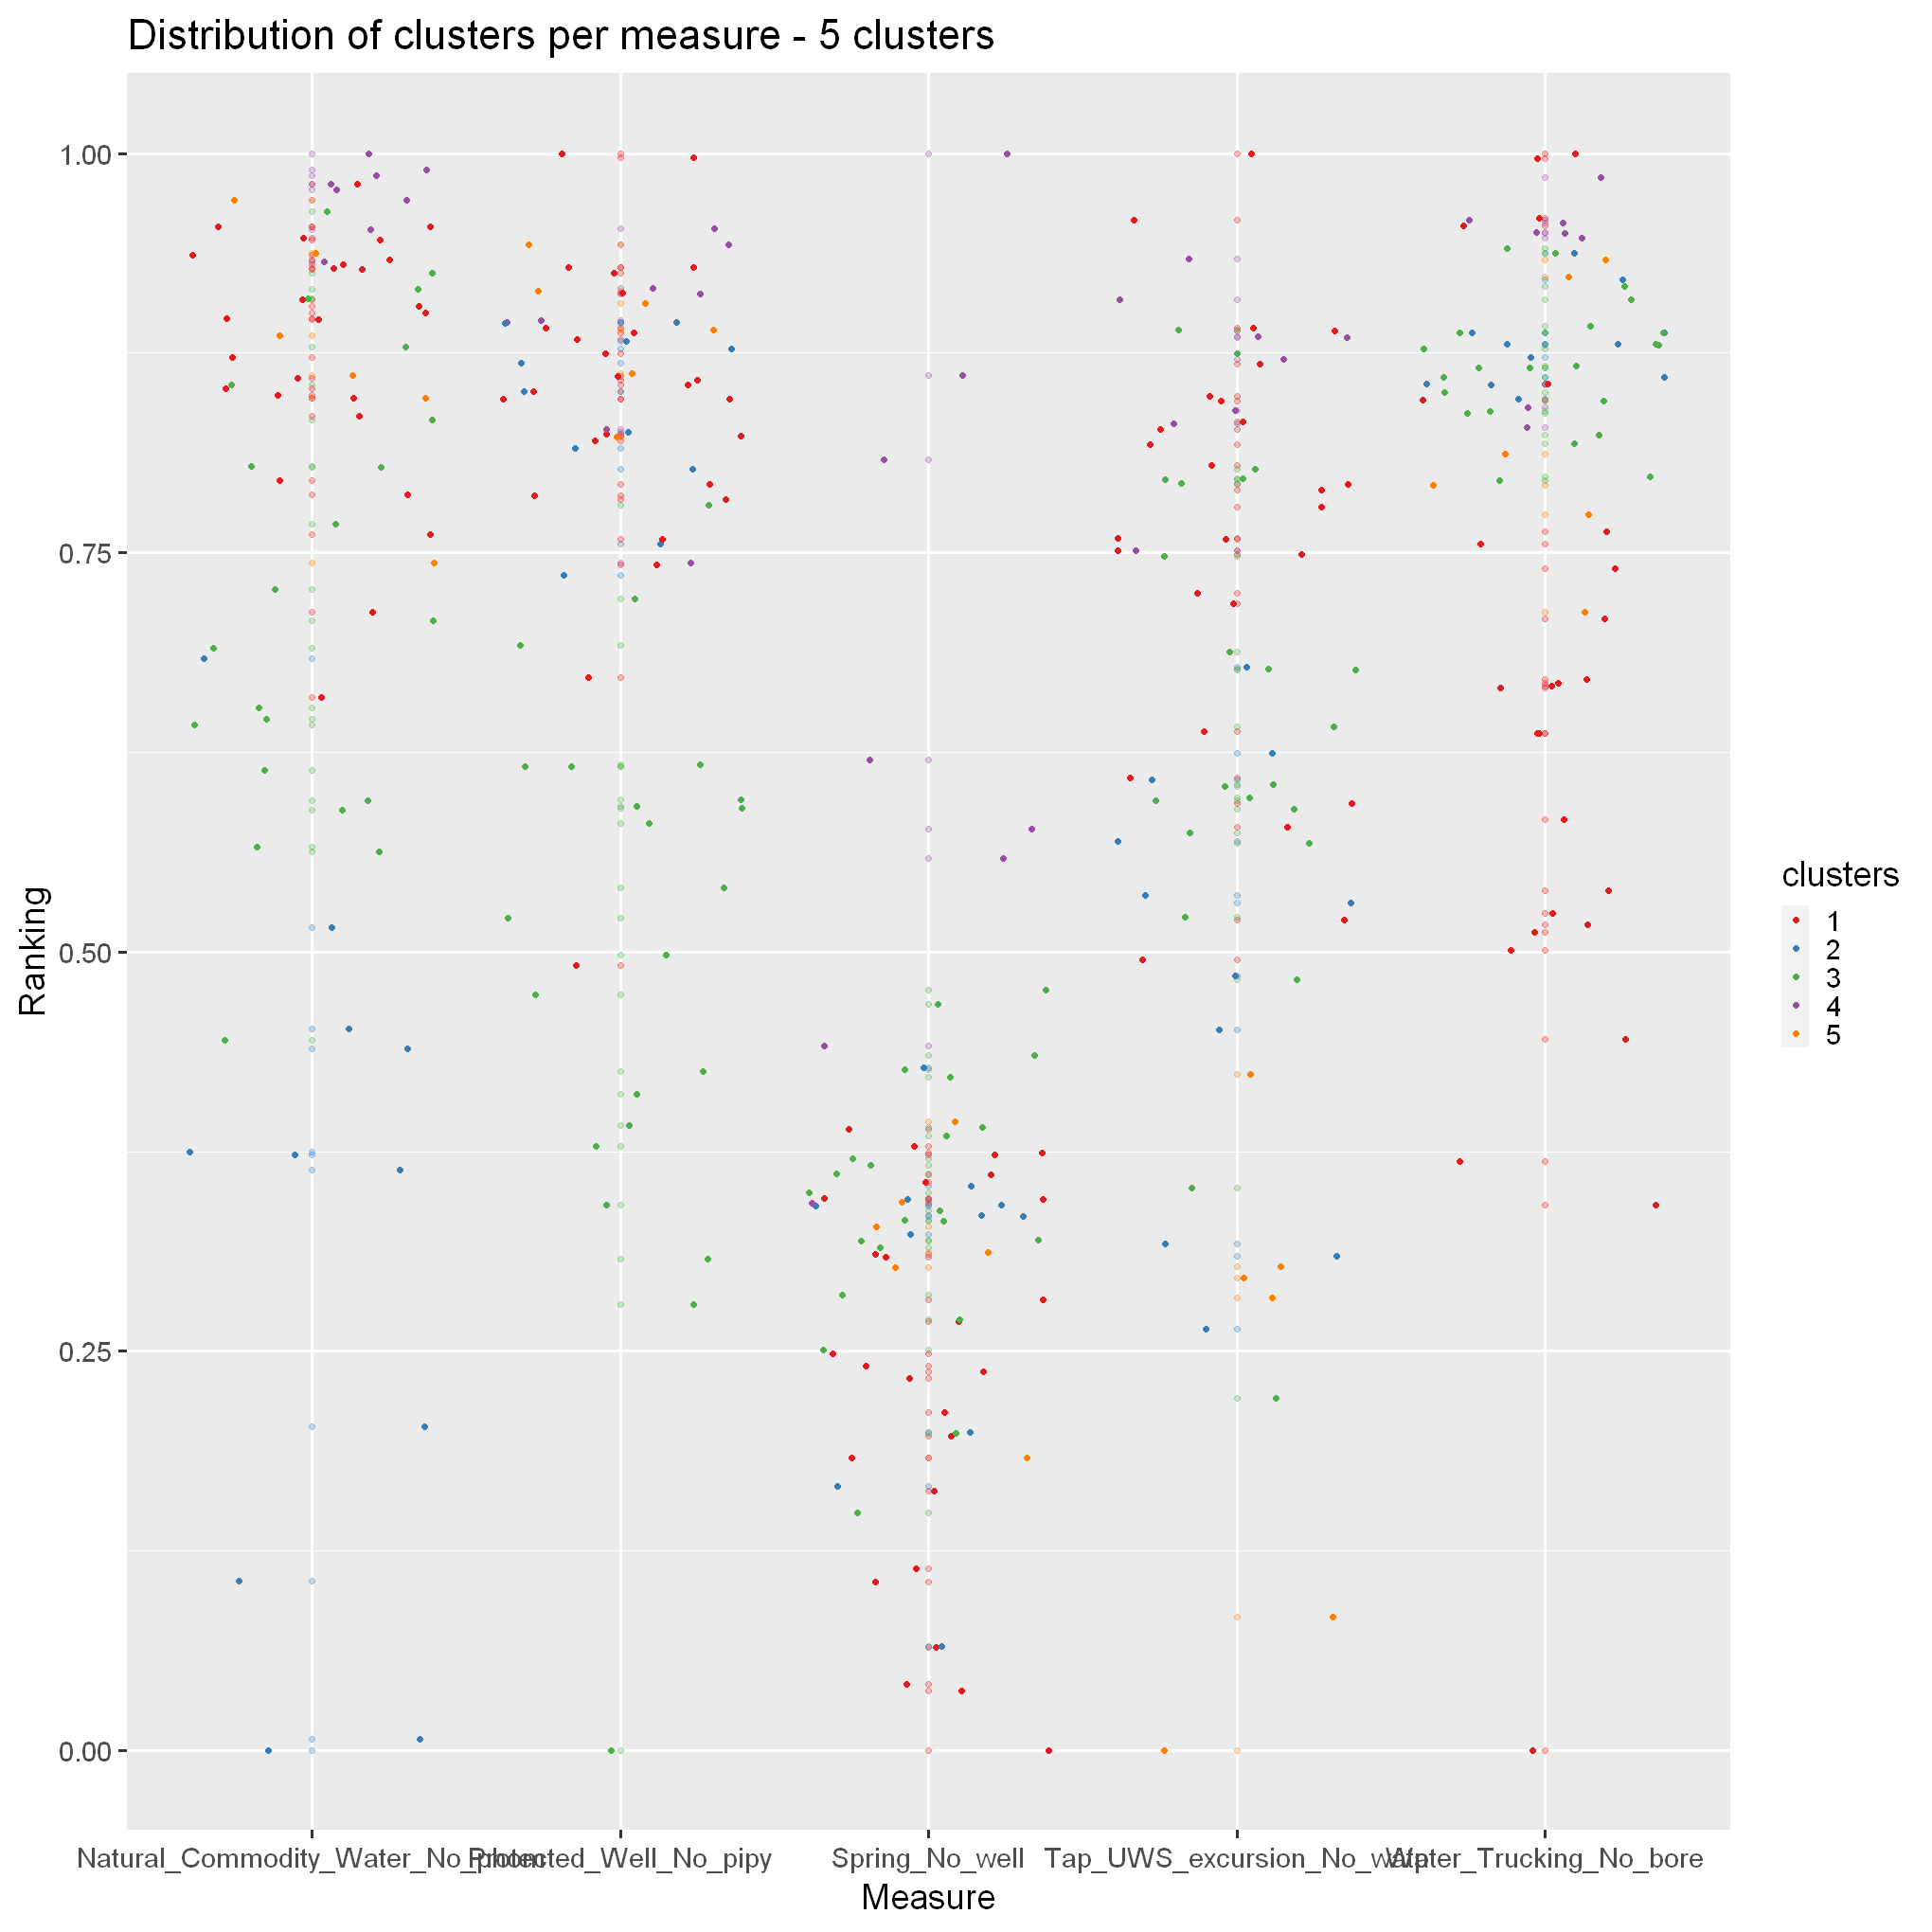

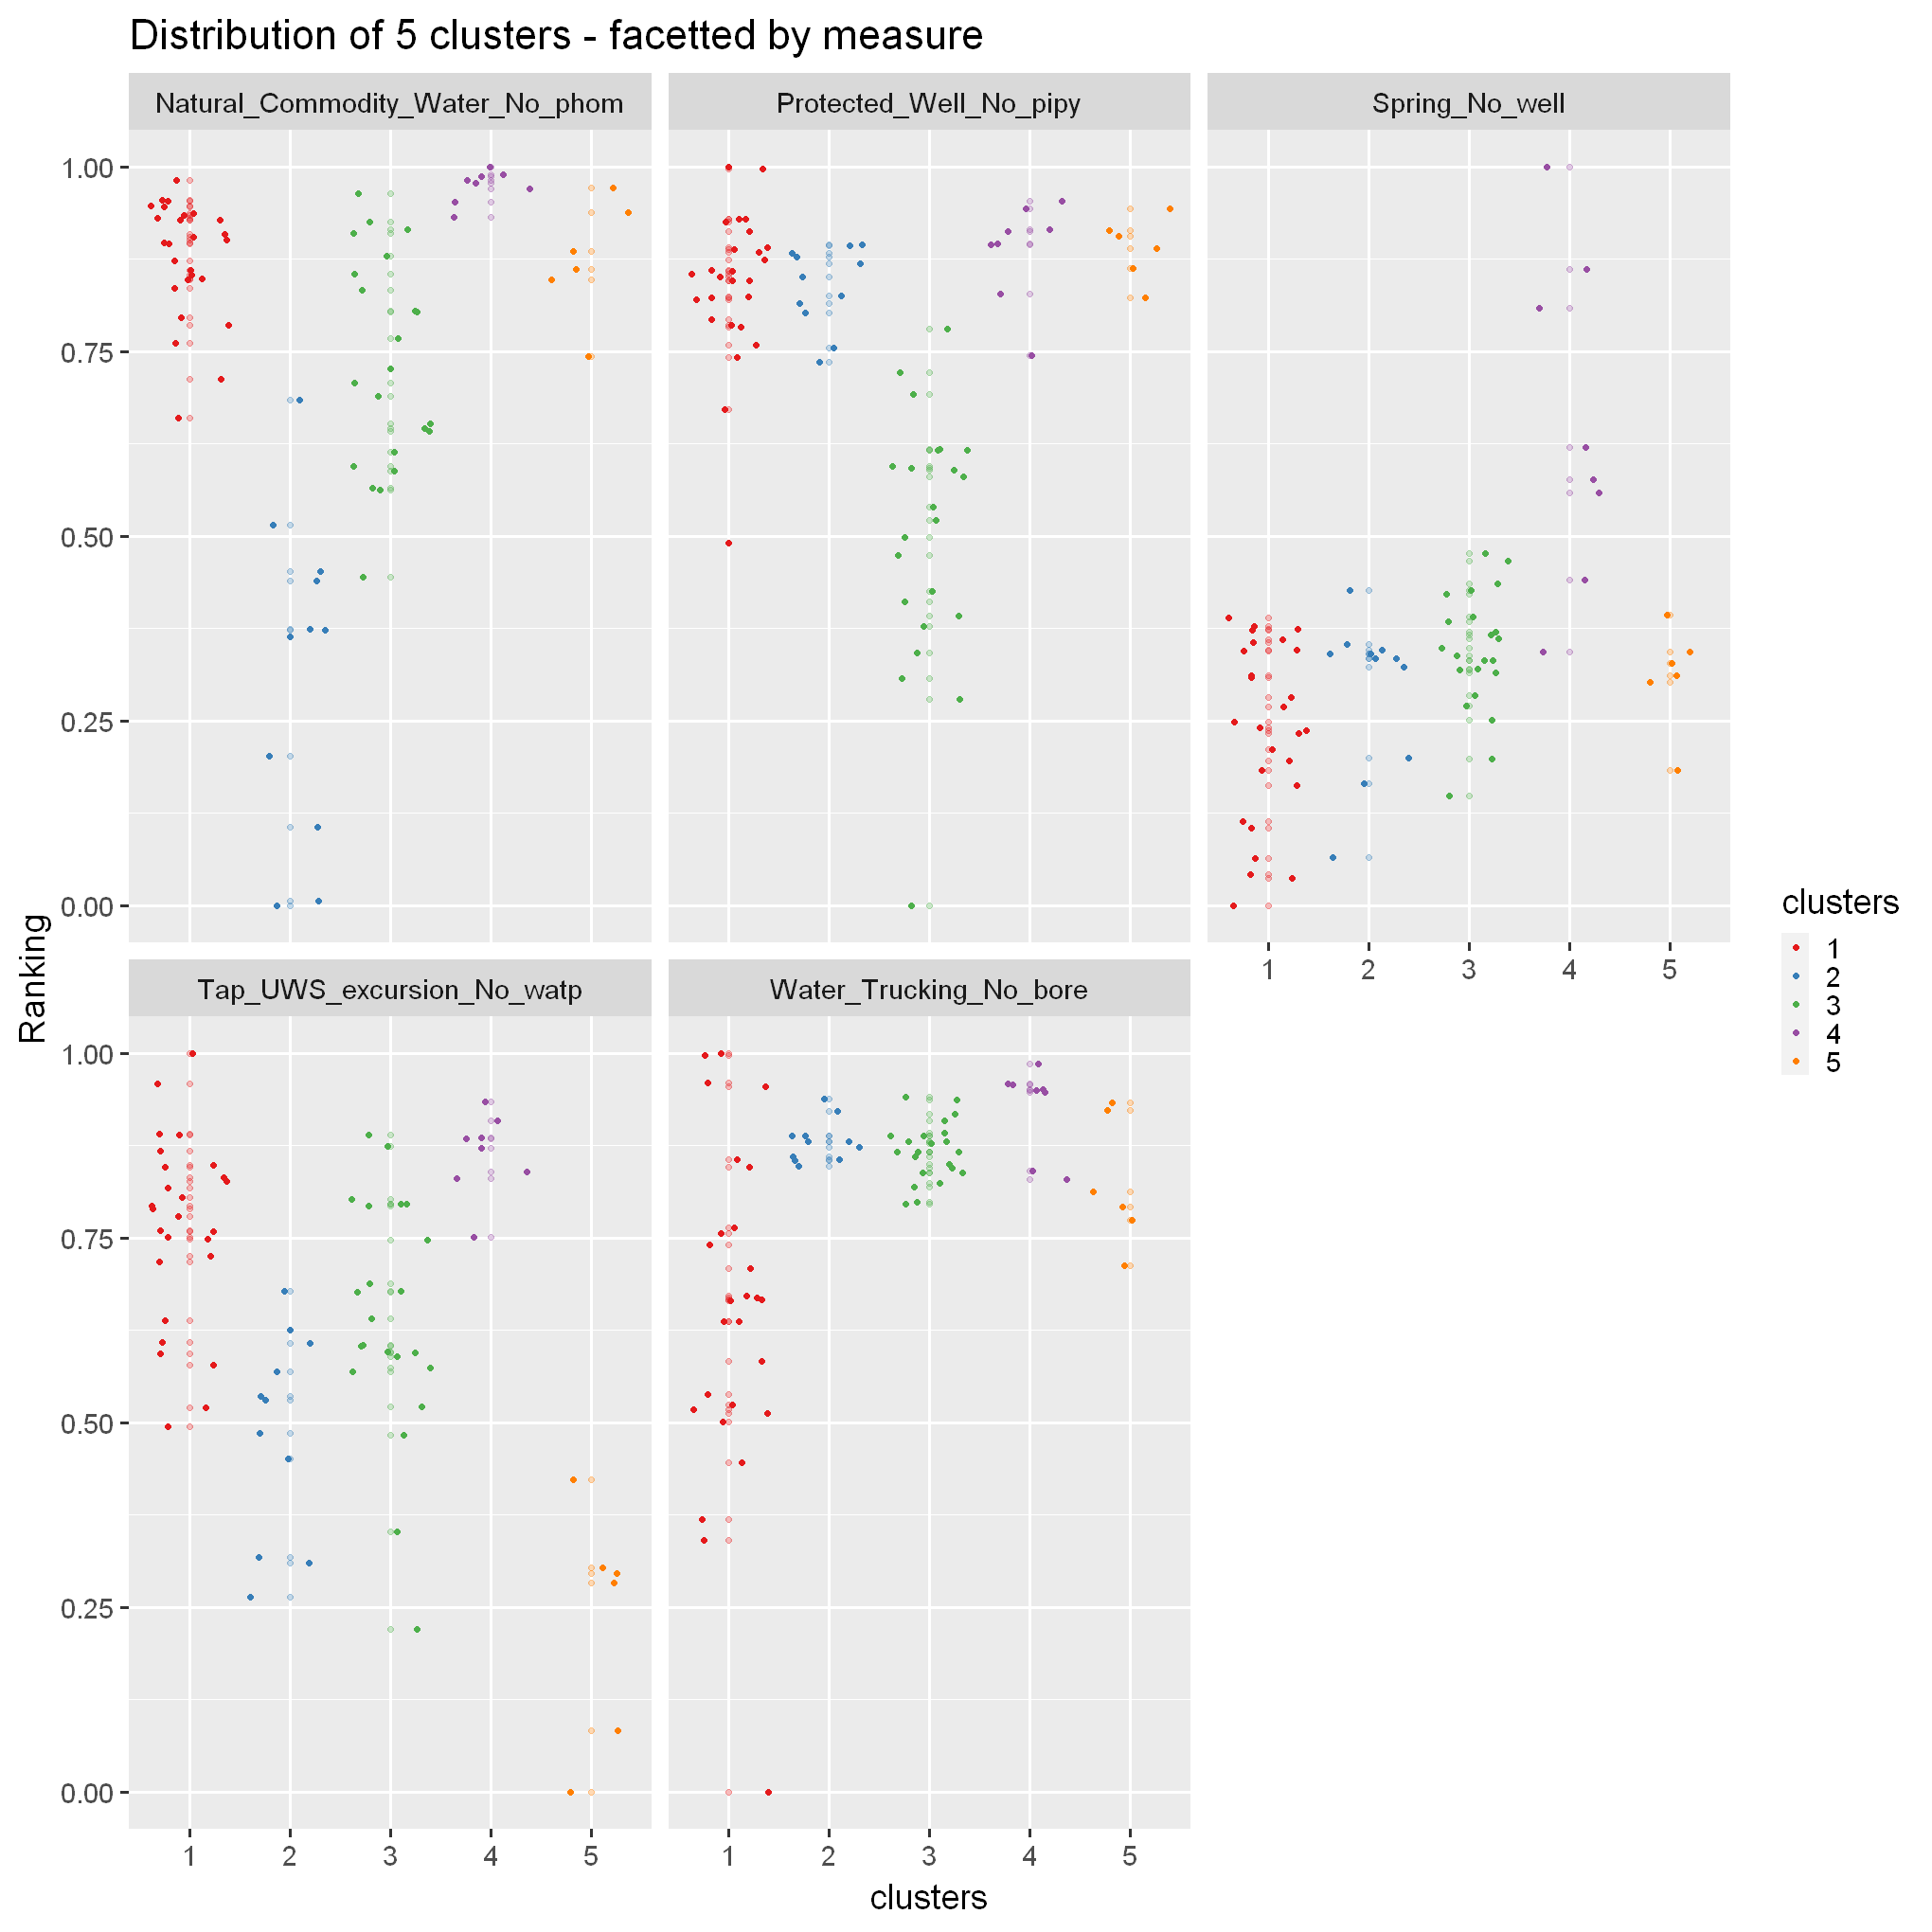

In [10]:
#data_wa$cluster <- cutree(hc.ward2,4) 
#head(df$clusters,7)
hc.ward2=hclust(dist(df), method ="ward.D2")
df$clusters <- cutree(hc.ward2,5)
df$clusters <- as.factor(df$clusters)

p <- ggplot(df, aes(clusters, Tap_UWS_excursion_No_watp, color = clusters, fill = clusters)) +
  geom_point(alpha = 0.6) +
  geom_jitter() +
  geom_point() +
  ggtitle("Distribution of clusters by NARS Lab") +
  scale_color_manual(values=c('#E41A1C','#377EB8','#4DAF4A','#984EA3','#FF7F00') )
p <- p + theme_grey(base_size = 22) 
p

table(df$clusters)

#Group by the cluster assignment and calculate averages
df_clus_avg <- df %>%
  group_by(clusters) %>%
  summarize_if(is.numeric, mean, na.rm=TRUE)


head(df_clus_avg,7) 

sapply(df_clus_avg, class)
#Create a parallel coordinate plot of the values:
ggparcoord <- ggparcoord(df_clus_avg, columns = c(2:6), 
           groupColumn = "clusters", scale = "globalminmax", order = "skewness") +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) + geom_point(color = "#00AFBB") 
    
#make a dot plot
countries_gathered <- df %>% gather(Measure, Ranking, Tap_UWS_excursion_No_watp:	Spring_No_well) 

g <- ggplot(countries_gathered, aes(Measure, Ranking, color = clusters )) +
  geom_point(alpha = 0.3) +
  geom_jitter() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  ggtitle("Distribution of clusters per measure - 5 clusters") 
   
g <- g + theme_grey(base_size = 22) +  scale_color_manual(values=c('#E41A1C','#377EB8','#4DAF4A','#984EA3','#FF7F00')) 
g 
countries_gathered %>% 

ggplot(aes(clusters, Ranking, col = clusters)) +
  geom_point(alpha = 0.3) +
  geom_jitter() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  ggtitle("Distribution of 5 clusters - facetted by measure") +
  facet_wrap(~Measure) +
 theme_grey(base_size = 22) +  
scale_color_manual(values=c('#E41A1C','#377EB8','#4DAF4A','#984EA3','#FF7F00'))
# set the set factor as for the clusters


# Ranking

In [11]:
df.wa <- read_excel("../../results/df-five-scores.xlsx",sheet=1)
df.wa <- df.wa %>% 
  rename(
    Tap_UWS_excursion_No_watp = ML4,
     Natural_Commodity_Water_No_phom = ML3,
     Protected_Well_No_pipy = ML2,
     Water_Trucking_No_bore = ML1,
     Spring_No_well = ML5   
    )

In [12]:
head(df.wa,7) # clean df at next save (2 cluster columns - only 1 needed; etc) #df also needs to be only water accessibility variables

Country,Tap_UWS_excursion_No_watp,Natural_Commodity_Water_No_phom,Protected_Well_No_pipy,Water_Trucking_No_bore,Spring_No_well
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,0.7180895,0.947179463,0.8835872,0.7634235,0.2686459
Albania,0.4514531,0.451805440,0.8256810,0.8877911,0.3345356
Angola,0.7249451,0.953864441,0.8199022,0.9546776,0.2823771
Armenia,0.5306486,0.006983022,0.7361201,0.8464063,0.3454025
Azerbaijan,0.5745546,0.565446750,0.5808397,0.7953093,0.3850820
Bangladesh,0.4949342,0.761408482,0.7931200,0.0000000,0.3454896
Benin,0.7928975,0.904114983,0.8876618,0.6709822,0.1622302


In [13]:
df.wa["norm"] <- apply(df.wa[2:5], 1, function(x) sqrt(sum(x^2)) ) #assuming columns 5:10 are the water accessibility variables
# Ideally, df should just be the countries and the water access. variables ONLY. This, way, the code should then be:
# df["norm"] <- apply(df, 1, function(x) sqrt(sum(x^2)) )

In [14]:
df.wa["distToCentroid"] = 0 # initialize

In [15]:
df.wa$clusters <- as.numeric(dfsimple$clusters)
head(df.wa)
#Turn into numeric to find centroids

Country,Tap_UWS_excursion_No_watp,Natural_Commodity_Water_No_phom,Protected_Well_No_pipy,Water_Trucking_No_bore,Spring_No_well,norm,distToCentroid,clusters
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,0.7180895,0.947179463,0.8835872,0.7634235,0.2686459,1.666236,0,1
Albania,0.4514531,0.451805440,0.8256810,0.8877911,0.3345356,1.370350,0,2
Angola,0.7249451,0.953864441,0.8199022,0.9546776,0.2823771,1.737542,0,1
Armenia,0.5306486,0.006983022,0.7361201,0.8464063,0.3454025,1.240932,0,2
Azerbaijan,0.5745546,0.565446750,0.5808397,0.7953093,0.3850820,1.272688,0,3
Bangladesh,0.4949342,0.761408482,0.7931200,0.0000000,0.3454896,1.205712,0,1


In [16]:
# assuming centroiddf.wa is your vector of cluster centroids

# copied this from your earlier notebook
df.wa.aggregate <- aggregate(df.wa[,c(2:5)], list(clusters=dfsimple$clusters), mean)
df.wa.aggregate <- df.wa.aggregate[,c(1:5)]
centroiddf.wa <- apply(df.wa.aggregate, 1, function(x) sqrt(sum(x^2)) ) #How close is each country to the cen-troid of the cluster

head(centroiddf.wa)       
                       
                       
df.wa$clusters <- dfsimple$clusters                      
head(df.wa,7)
                       df <- df.wa

[1] 1.864184 2.411623 3.308383 4.397351 5.223894

Country,Tap_UWS_excursion_No_watp,Natural_Commodity_Water_No_phom,Protected_Well_No_pipy,Water_Trucking_No_bore,Spring_No_well,norm,distToCentroid,clusters
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,0.7180895,0.947179463,0.8835872,0.7634235,0.2686459,1.666236,0,1
Albania,0.4514531,0.451805440,0.8256810,0.8877911,0.3345356,1.370350,0,2
Angola,0.7249451,0.953864441,0.8199022,0.9546776,0.2823771,1.737542,0,1
Armenia,0.5306486,0.006983022,0.7361201,0.8464063,0.3454025,1.240932,0,2
Azerbaijan,0.5745546,0.565446750,0.5808397,0.7953093,0.3850820,1.272688,0,3
Bangladesh,0.4949342,0.761408482,0.7931200,0.0000000,0.3454896,1.205712,0,1
Benin,0.7928975,0.904114983,0.8876618,0.6709822,0.1622302,1.638375,0,1


In [17]:
# Then here, you compute the distance to centroid cluster by cluster
df[df$clusters == 1, "distToCentroid"] = abs(df[df$clusters == 1, "norm"] - centroiddf.wa[1])
df[df$clusters == 2, "distToCentroid"] = abs(df[df$clusters == 2, "norm"] - centroiddf.wa[2])
df[df$clusters == 3, "distToCentroid"] = abs(df[df$clusters == 3, "norm"] - centroiddf.wa[3])
df[df$clusters == 4, "distToCentroid"] = abs(df[df$clusters == 4, "norm"] - centroiddf.wa[4])
df[df$clusters == 5, "distToCentroid"] = abs(df[df$clusters == 5, "norm"] - centroiddf.wa[5])
#df[df$clusters == 6, "distToCentroid"] = abs(df[df$clusters == 6, "norm"] - centroiddf.wa[6])                       

head(df,7)
write_xlsx(df , '../../results/df-fa-cluster-rank.xlsx')

Country,Tap_UWS_excursion_No_watp,Natural_Commodity_Water_No_phom,Protected_Well_No_pipy,Water_Trucking_No_bore,Spring_No_well,norm,distToCentroid,clusters
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,0.7180895,0.947179463,0.8835872,0.7634235,0.2686459,1.666236,0.1979482,1
Albania,0.4514531,0.451805440,0.8256810,0.8877911,0.3345356,1.370350,1.0412728,2
Angola,0.7249451,0.953864441,0.8199022,0.9546776,0.2823771,1.737542,0.1266426,1
Armenia,0.5306486,0.006983022,0.7361201,0.8464063,0.3454025,1.240932,1.1706908,2
Azerbaijan,0.5745546,0.565446750,0.5808397,0.7953093,0.3850820,1.272688,2.0356952,3
Bangladesh,0.4949342,0.761408482,0.7931200,0.0000000,0.3454896,1.205712,0.6584722,1
Benin,0.7928975,0.904114983,0.8876618,0.6709822,0.1622302,1.638375,0.2258100,1


In [18]:
# You can then sort each subset by the size of "distToCentroid"
df %>% 
  arrange_at("Country", desc) %>%
  arrange_at("distToCentroid") %>%
  select(1, 8, 9)

Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Eritrea,0.007821841,1
Mauritania,0.009282264,1
Niger,0.021927734,1
Tanzania,0.094727482,1
Chad,0.097368784,1
Angola,0.126642596,1
Mozambique,0.170529713,1
Mali,0.180156838,1
Togo,0.196481825,1


In [19]:
# You can then sort each subset by the size of "distToCentroid"
df1 = df %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1, 8, 9)


In [20]:
head(df1)
cluster.one <- subset(df1, clusters == 1 )
cluster.two <- subset(df1, clusters == 2 )
cluster.three <- subset(df1, clusters == 3 )
cluster.four <- subset(df1, clusters == 4 )
cluster.five <- subset(df1, clusters == 5 )
#cluster.six <- subset(df1, clusters == 6 )
head(cluster.one)
summary(cluster.one)

Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Eritrea,0.007821841,1
Mauritania,0.009282264,1
Niger,0.021927734,1
Tanzania,0.094727482,1
Chad,0.097368784,1
Angola,0.126642596,1


Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Eritrea,0.007821841,1
Mauritania,0.009282264,1
Niger,0.021927734,1
Tanzania,0.094727482,1
Chad,0.097368784,1
Angola,0.126642596,1


   Country          distToCentroid        clusters
 Length:26          Min.   :0.007822   Min.   :1  
 Class :character   1st Qu.:0.172936   1st Qu.:1  
 Mode  :character   Median :0.269659   Median :1  
                    Mean   :0.278644   Mean   :1  
                    3rd Qu.:0.352158   3rd Qu.:1  
                    Max.   :0.658472   Max.   :1  

In [21]:
cluster.one %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1:3)
cluster.two %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1:3)
cluster.three %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1:3)
cluster.four %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
   arrange_at("clusters") %>%
 select(1:3)
cluster.five %>% 
 arrange_at("Country", desc) %>%
  arrange_at("distToCentroid") %>%
 arrange_at("clusters") %>%
 select(1:3)
#cluster.six %>% 
  #arrange_at("Country", desc) %>%
  # arrange_at("distToCentroid") %>%
  # arrange_at("clusters") %>%
# select(1:3)

Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Eritrea,0.007821841,1
Mauritania,0.009282264,1
Niger,0.021927734,1
Tanzania,0.094727482,1
Chad,0.097368784,1
Angola,0.126642596,1
Mozambique,0.170529713,1
Mali,0.180156838,1
Togo,0.196481825,1


Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Moldova,0.8495172,2
Morocco,0.9126923,2
Albania,1.0412728,2
Turkey,1.0517205,2
Ukraine,1.0555420,2
Peru,1.0677296,2
Honduras,1.0755372,2
Egypt,1.0797062,2
Jordan,1.0849591,2


Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Sao Tome and Principe,1.641523,3
Lesotho,1.647862,3
Congo,1.723013,3
Kenya,1.734974,3
Vietnam,1.751034,3
Cote d'Ivoire,1.766378,3
Timor-Leste,1.777404,3
Eswatini,1.783265,3
Gambia,1.833438,3


Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Haiti,2.508296,4
Congo Democratic Republic,2.513623,4
Madagascar,2.513927,4
Burundi,2.526208,4
Rwanda,2.571478,4
Papua New Guinea,2.614050,4
Sierra Leone,2.616855,4
Ethiopia,2.686645,4


Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Yemen,3.616831,5
Dominican Republic,3.672410,5
Maldives,3.679326,5
Indonesia,3.705076,5
Cambodia,3.724036,5
Philippines,3.807875,5


# World Map

In [22]:
df = read_excel('../../results/df-fa-cluster-rank.xlsx') #change name of file to sth descriptive (e.g. country-clusters)
head(df)

Country,Tap_UWS_excursion_No_watp,Natural_Commodity_Water_No_phom,Protected_Well_No_pipy,Water_Trucking_No_bore,Spring_No_well,norm,distToCentroid,clusters
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,0.7180895,0.947179463,0.8835872,0.7634235,0.2686459,1.666236,0.1979482,1
Albania,0.4514531,0.451805440,0.8256810,0.8877911,0.3345356,1.370350,1.0412728,2
Angola,0.7249451,0.953864441,0.8199022,0.9546776,0.2823771,1.737542,0.1266426,1
Armenia,0.5306486,0.006983022,0.7361201,0.8464063,0.3454025,1.240932,1.1706908,2
Azerbaijan,0.5745546,0.565446750,0.5808397,0.7953093,0.3850820,1.272688,2.0356952,3
Bangladesh,0.4949342,0.761408482,0.7931200,0.0000000,0.3454896,1.205712,0.6584722,1


In [23]:
df = df[, c(1,9)] # select only country name and cluster number
head(df,7)

Country,clusters
<chr>,<dbl>
Afghanistan,1
Albania,2
Angola,1
Armenia,2
Azerbaijan,3
Bangladesh,1
Benin,1


In [24]:
colnames(df) = c('region', 'value') # change column names for ggplot
dim(df)
head(df)

[1] 73  2

region,value
<chr>,<dbl>
Afghanistan,1
Albania,2
Angola,1
Armenia,2
Azerbaijan,3
Bangladesh,1


In [25]:
# This is to convert country names in df to match those in the worldMap dataframe
coords <- joinCountryData2Map(df, joinCode = "NAME", nameJoinColumn = "region")
coords = data.frame(coords)
colnames(coords) = tolower(colnames(coords))
colnames(coords)
coords = drop_na(coords, value)
coords$name

71 codes from your data successfully matched countries in the map
2 codes from your data failed to match with a country code in the map
172 codes from the map weren't represented in your data


[1] "scalerank"    "labelrank"    "featurecla"   "sovereignt"   "sov_a3"      
 [6] "adm0_dif"     "level"        "type"         "admin"        "adm0_a3"     
[11] "geou_dif"     "geounit"      "gu_a3"        "su_dif"       "subunit"     
[16] "su_a3"        "name"         "abbrev"       "postal"       "name_forma"  
[21] "terr_"        "name_sort"    "map_color"    "pop_est"      "gdp_md_est"  
[26] "fips_10_"     "iso_a2"       "iso_a3"       "iso_n3"       "iso3"        
[31] "lon"          "lat"          "iso3.1"       "admin.1"      "region"      
[36] "continent"    "geo3major"    "geo3"         "image24"      "glocaf"      
[41] "stern"        "sresmajor"    "sres"         "gbd"          "avoidnumeric"
[46] "avoidname"    "ldc"          "sid"          "lldc"         "region"      
[51] "value"        "admin.2"      "iso3.2"

[1] Afghanistan           Angola                Albania              
 [4] Armenia               Azerbaijan            Burundi              
 [7] Benin                 Burkina Faso          Bangladesh           
[10] Bolivia               Ivory Coast           Cameroon             
[13] Congo (Brazzaville)   Colombia              Dominican Rep.       
[16] Egypt                 Eritrea               Ethiopia             
[19] Gabon                 Ghana                 Guinea               
[22] Gambia                Guatemala             Guyana               
[25] Honduras              Haiti                 Indonesia            
[28] India                 Jordan                Kenya                
[31] Kyrgyzstan            Cambodia              Liberia              
[34] Lesotho               Morocco               Moldova              
[37] Madagascar            Mali                  Myanmar              
[40] Mozambique            Mauritania            Malawi               
[43] Namibia               Niger                 Nigeria              
[46] Nicaragua             Nepal                 Pakistan             
[49] Peru                  Philippines           Papua New Guinea     
[52] Rwanda                Senegal               Sierra Leone         
[55] Chad                  Togo                  Tajikistan           
[58] Turkmenistan          East Timor            Turkey               
[61] Tanzania              Uganda                Ukraine              
[64] Vietnam               Yemen                 South Africa         
[67] Zambia                Zimbabwe              Comoros              
[70] Maldives              Sao Tome and Principe
243 Levels: Afghanistan Aland Albania Algeria American Samoa Andorra ... Zimbabwe

In [26]:
setdiff(df$region,coords$name)

[1] "Congo"                     "Congo Democratic Republic"
[3] "Cote d'Ivoire"             "Dominican Republic"       
[5] "Eswatini"                  "Kyrgyz Republic"          
[7] "Timor-Leste"

In [27]:
# Correct the country names in DF
df[df=='Timor-Leste'] = "East Timor"
df[df=='Central African Republic'] = "Central African Rep."
df[df=='Cote d\'Ivoire'] = "Ivory Coast"
df[df=='Dominican Republic'] = "Dominican Rep."
df[df=='Kyrgyz Republic'] = "Kyrgyzstan"
df[df=='Eswatini'] = "Swaziland"
df[df=='Congo'] = "Congo (Brazzaville)"
df[df=='Congo Democratic Republic'] = "Congo (Kinshasa)"

In [28]:
# Get world map data (lat/long)
countrynames = df$region
worldMap <- getMap()
country_indices <- which(worldMap$NAME%in%countrynames)

In [29]:
# Get coordinates for all countries to plot base map
allCoords <- lapply(seq(1,243), function(i){
  dfn <- data.frame(worldMap@polygons[[i]]@Polygons[[1]]@coords)
  dfn$region =as.character(worldMap$NAME[i])
  colnames(dfn) <- list("long", "lat", "region")
  return(dfn)
})
allCoords <- do.call("rbind", allCoords)


In [30]:
# Get coordinates strictly for those in water accessibility dataset
waterCoords <- lapply(country_indices, function(i){
  dfn <- data.frame(worldMap@polygons[[i]]@Polygons[[1]]@coords)
  dfn$region =as.character(worldMap$NAME[i])
  colnames(dfn) <- list("long", "lat", "region")
  return(dfn)
})

waterCoords <- do.call("rbind", waterCoords)
waterCoords$value <- df$value[match(waterCoords$region,df$region)]
waterCoords$value <- factor(waterCoords$value)

[1] "#E41A1C" "#377EB8" "#4DAF4A" "#984EA3" "#FF7F00"

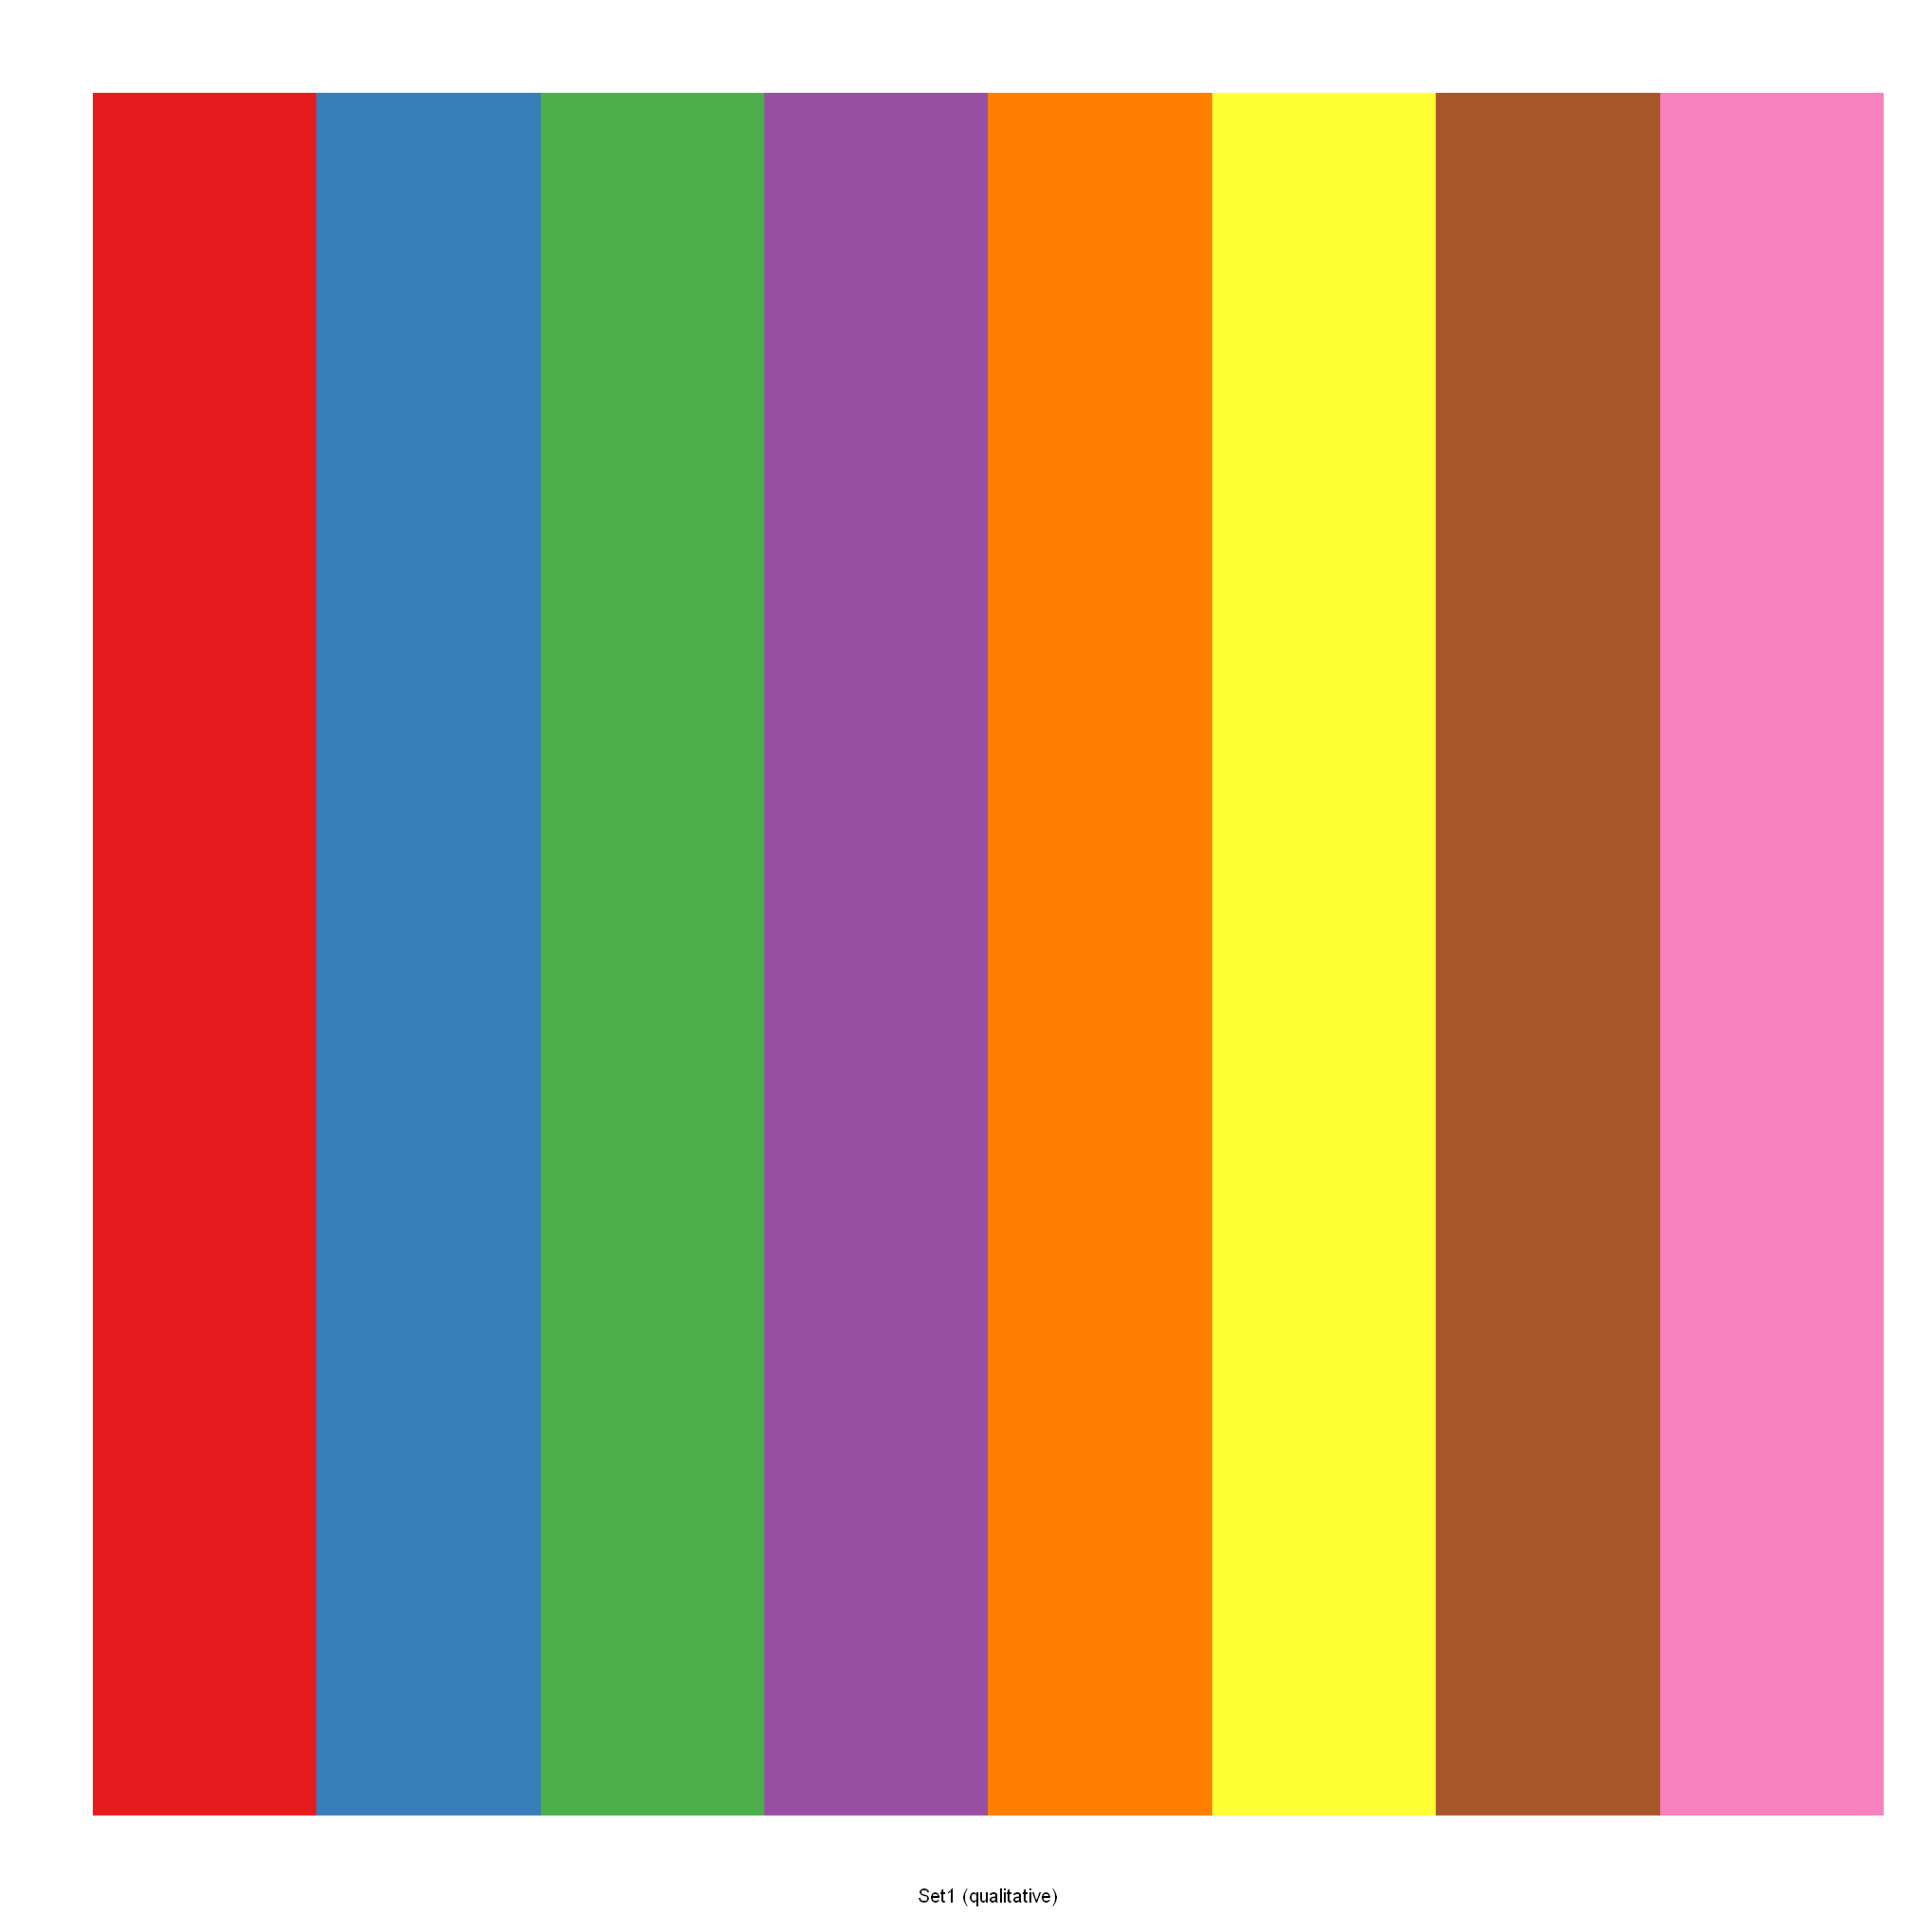

In [31]:
# View a single RColorBrewer palette by specifying its name
display.brewer.pal(n = 8, name = 'Set1')
# Set1 easy to see'#E41A1C','#377EB8','#4DAF4A','#984EA3','#FF7F00'
brewer.pal(n = 5, name = "Set1") # Best color scheme is Set1 

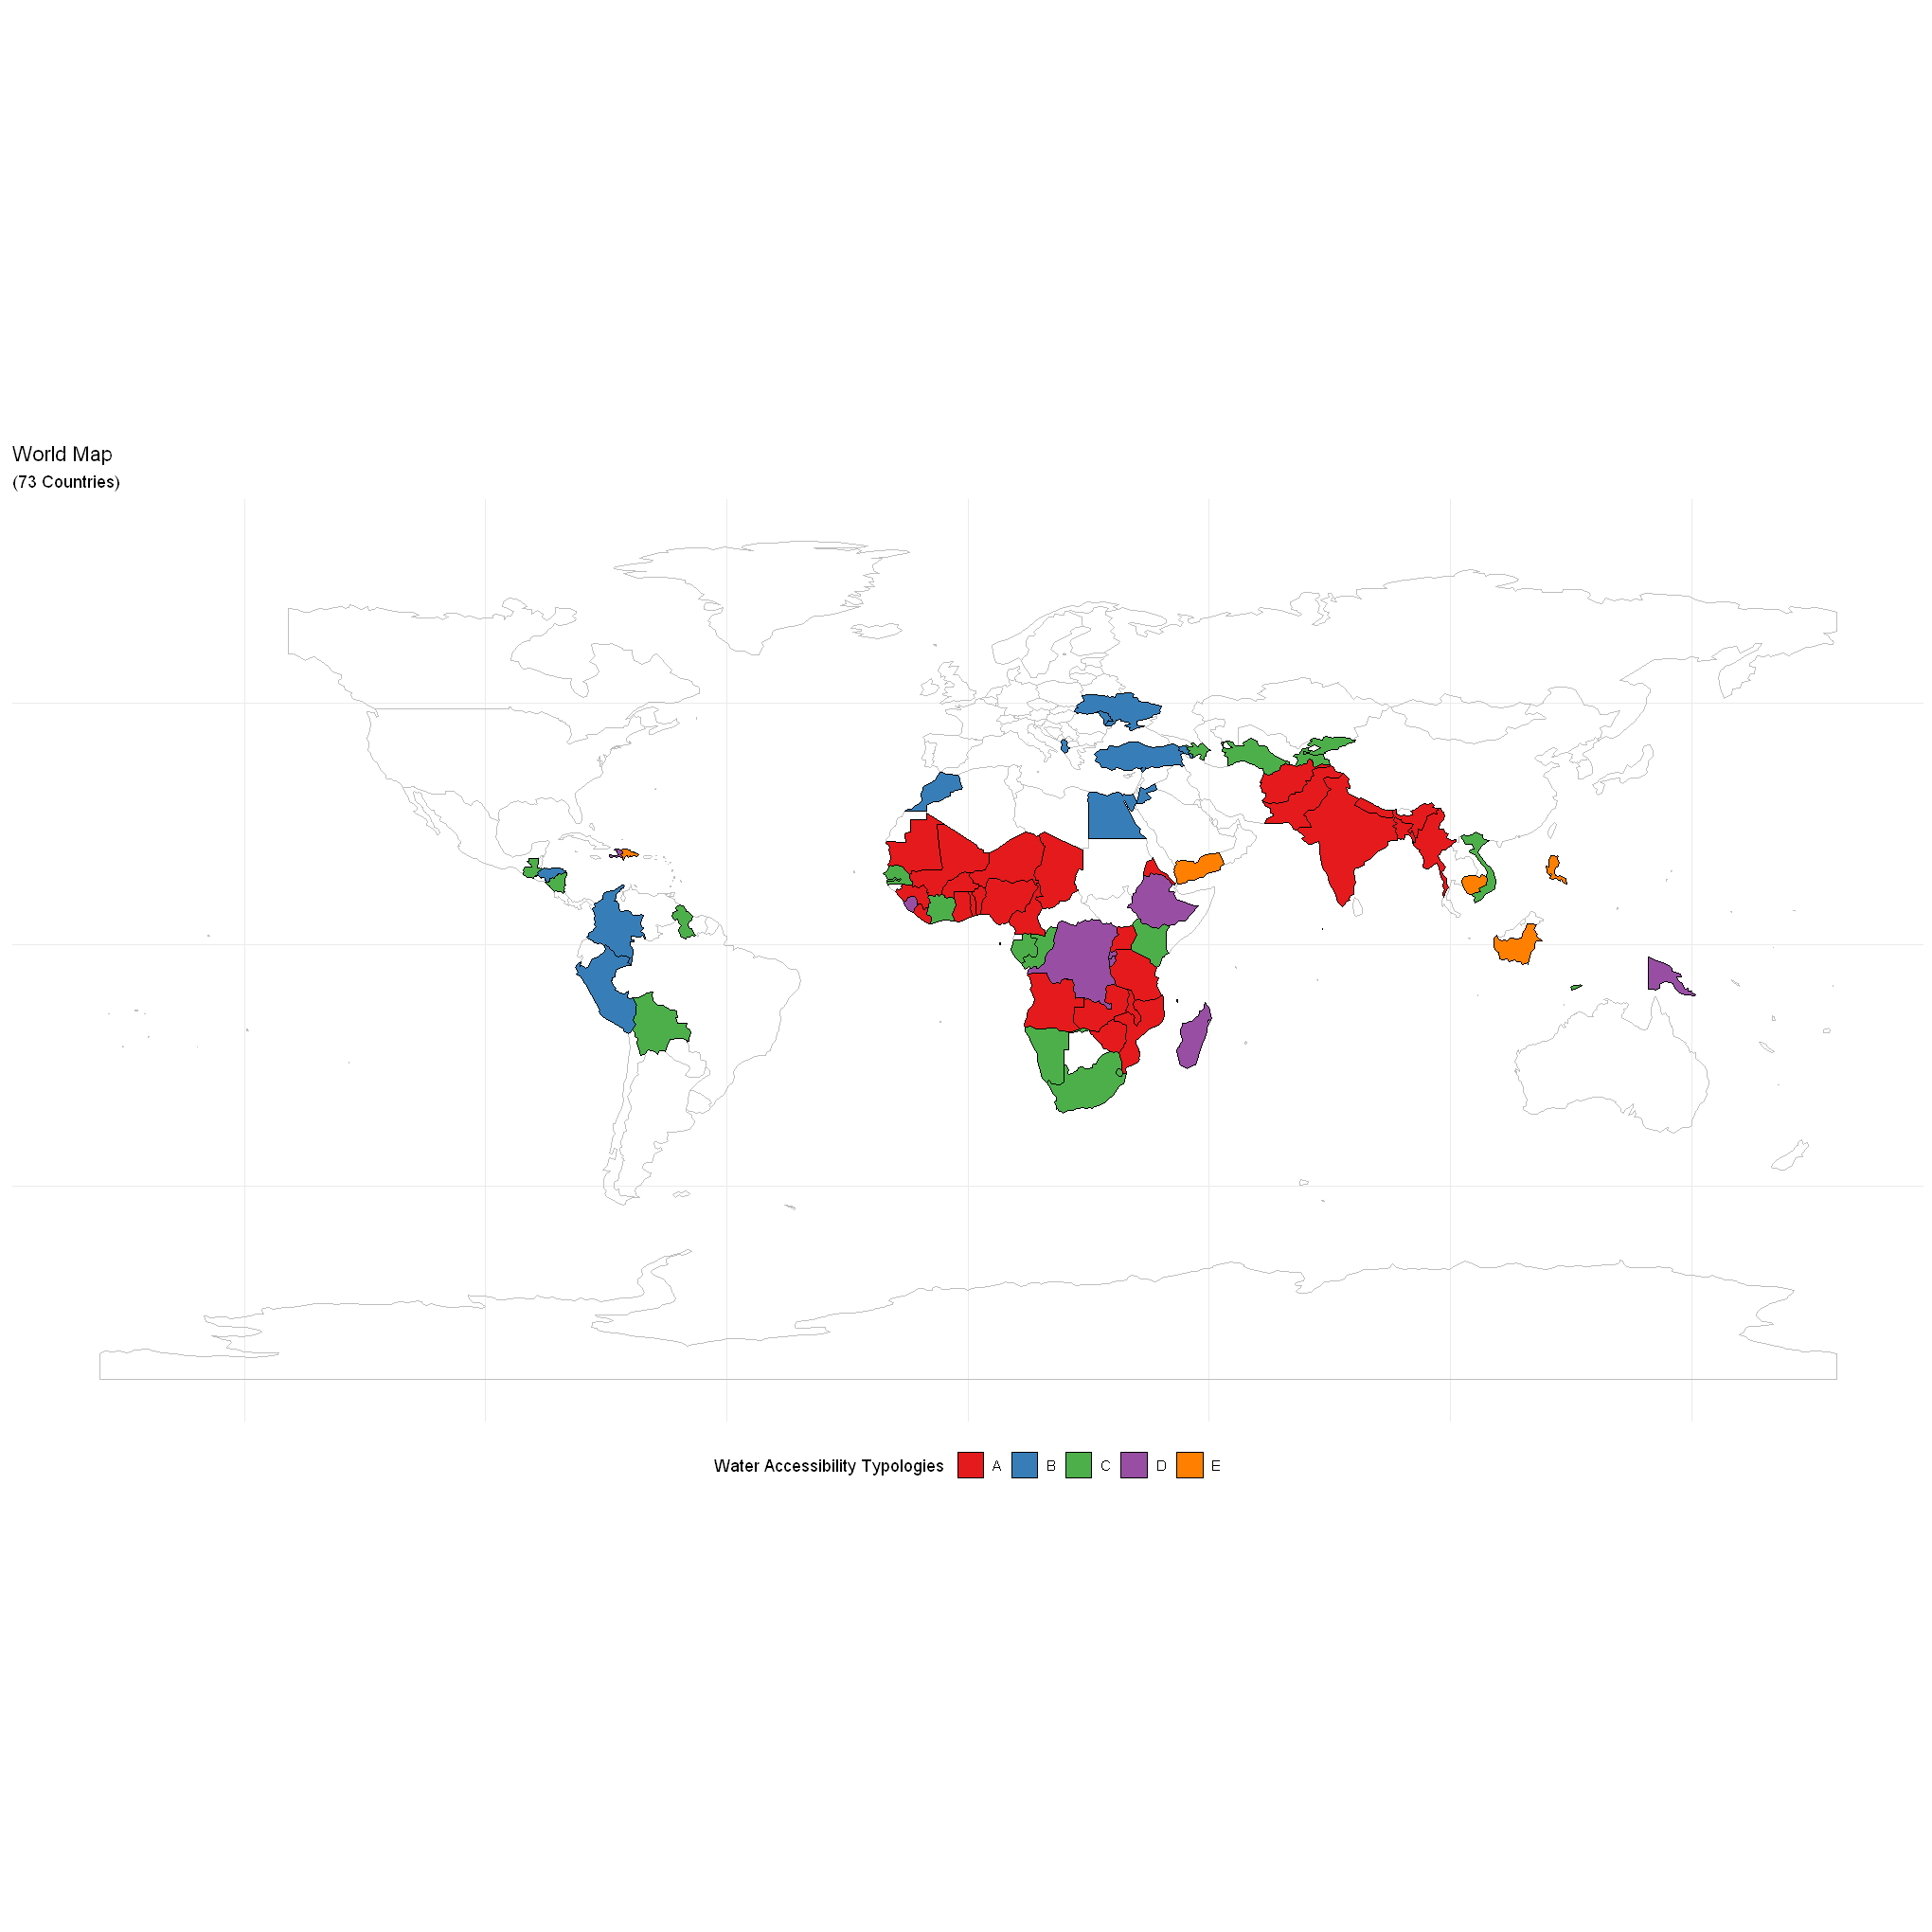

In [32]:
# Plot
options(repr.plot.width=17, repr.plot.height=17)
par(mar = c(1,1,1,1))
par(cex=1)
ggplot() +
    geom_sf(color = "black", fill= 'antiquewhite') +
    xlab("Longitude") + ylab("Latitude") +
    geom_polygon(data= allCoords, mapping = aes(x =long, y=lat,group = region),color="grey",fill=NA) + 
    geom_polygon( data = waterCoords, mapping = aes(x =long, y=lat,group = region, fill=value), size=.3,color="black") +
    expand_limits(x = waterCoords$long, y = waterCoords$lat)  + 
    scale_fill_brewer(palette='Set1', name="Water Accessibility Typologies", na.value="grey", labels = c("A", "B", "C","D","E")) +  #labels = c())+
    ggtitle("World Map", subtitle = paste0("(", length(unique(df$region)), " Countries)")) +
    theme_minimal() +
    theme(legend.position = "bottom",
        axis.ticks = element_blank(), 
        axis.title = element_blank(), 
        axis.text =  element_blank()) 
#     #guides(fill = guide_colorbar(barwidth = 10, barheight = .5))
